In [5]:
library(ggplot2)

In [6]:
library(forecast )

In [7]:
library(fpp2)

# Average method


In [ ]:
meanf(y, h)
# y contains the time series
# h is the forecast horizon

# Naïve method


In [ ]:
naive(y, h)
rwf(y, h) # Equivalent alternative

# Seasonal naïve method


In [ ]:
snaive(y, h)

# Drift method


In [ ]:
rwf(y, h, drift=TRUE)


# Examples

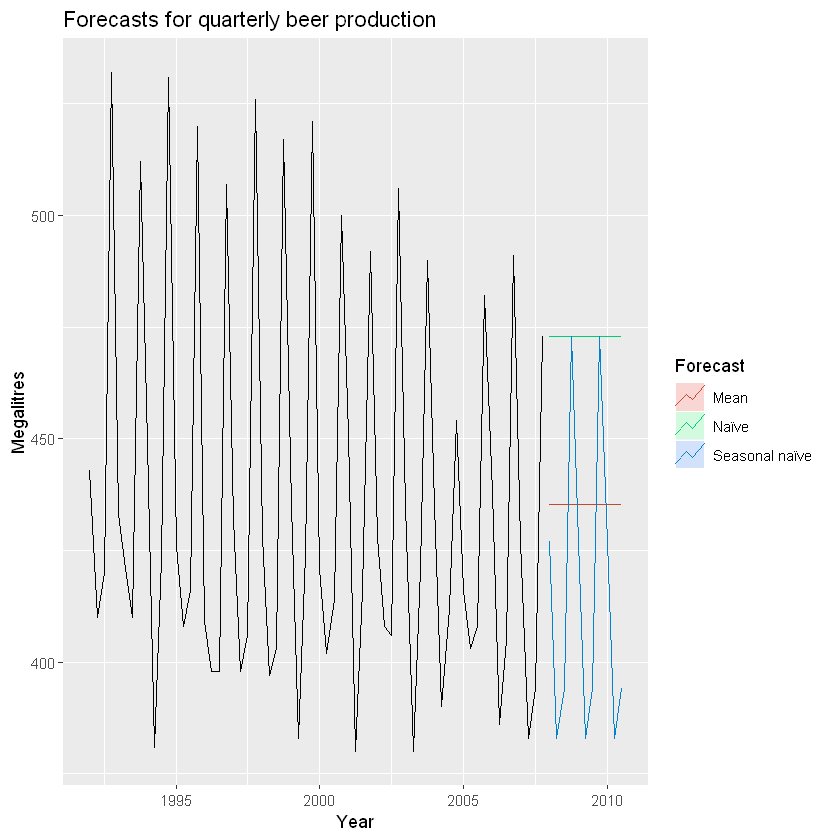

In [8]:
# Set training data from 1992 to 2007
beer2 <- window(ausbeer,start=1992,end=c(2007,4))
# Plot some forecasts
autoplot(beer2) +
  autolayer(meanf(beer2, h=11),
    series="Mean", PI=FALSE) +
  autolayer(naive(beer2, h=11),
    series="Naïve", PI=FALSE) +
  autolayer(snaive(beer2, h=11),
    series="Seasonal naïve", PI=FALSE) +
  ggtitle("Forecasts for quarterly beer production") +
  xlab("Year") + ylab("Megalitres") +
  guides(colour=guide_legend(title="Forecast"))

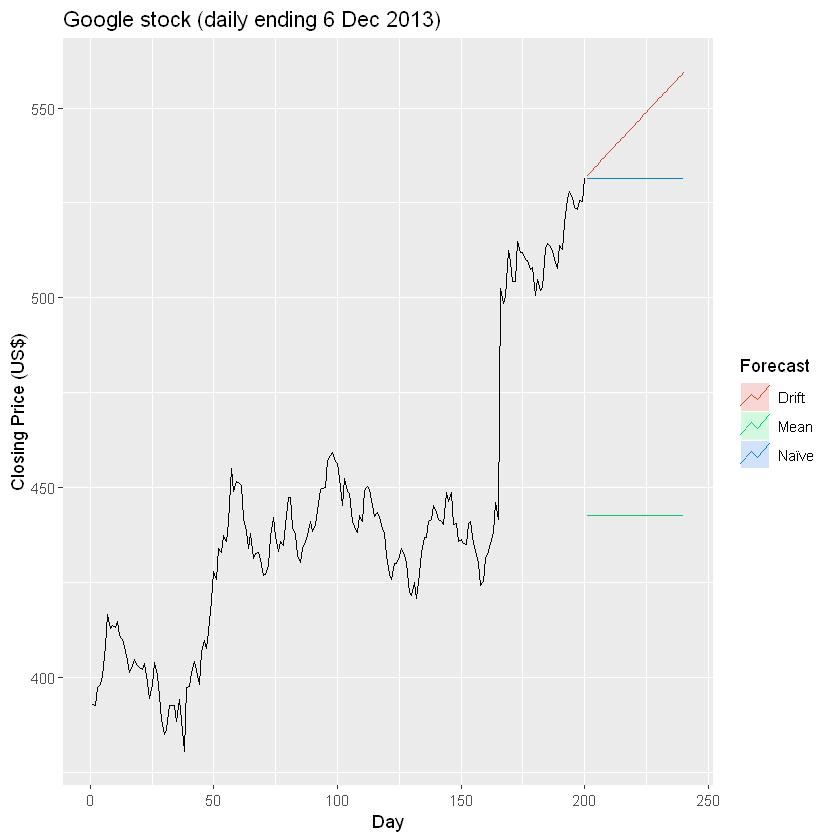

In [9]:
autoplot(goog200) +
  autolayer(meanf(goog200, h=40),
    series="Mean", PI=FALSE) +
  autolayer(rwf(goog200, h=40),
    series="Naïve", PI=FALSE) +
  autolayer(rwf(goog200, drift=TRUE, h=40),
    series="Drift", PI=FALSE) +
  ggtitle("Google stock (daily ending 6 Dec 2013)") +
  xlab("Day") + ylab("Closing Price (US$)") +
  guides(colour=guide_legend(title="Forecast"))

# 3.2 Transformations and adjustments


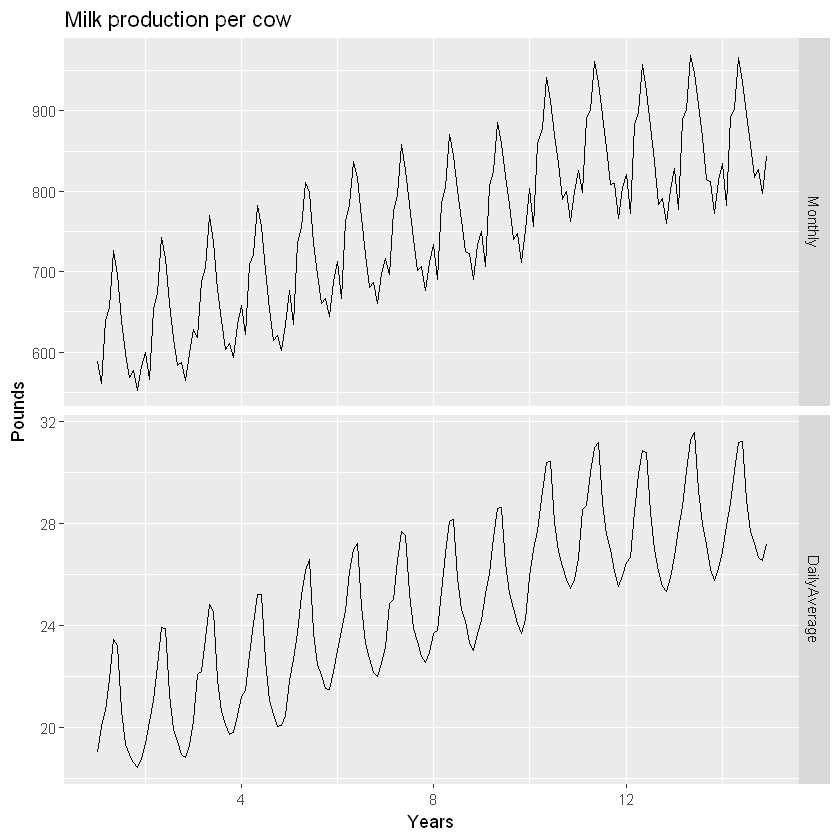

In [10]:
dframe <- cbind(Monthly = milk,
                DailyAverage = milk/monthdays(milk))
  autoplot(dframe, facet=TRUE) +
    xlab("Years") + ylab("Pounds") +
    ggtitle("Milk production per cow")

Notice how much simpler the seasonal pattern is in the average daily production plot compared to the average monthly production plot. By looking at the average daily production instead of the average monthly production, we effectively remove the variation due to the different month lengths. Simpler patterns are usually easier to model and lead to more accurate forecasts.



<strong> A similar adjustment can be done for sales data when the number of trading days in each month varies. In this case, the sales per trading day can be modelled instead of the total sales for each month. </strong>.


# Population adjustments


Any data that are affected by population changes can be adjusted to give per-capita data. That is, consider the data per person (or per thousand people, or per million people) rather than the total. For example, if you are studying the number of hospital beds in a particular region over time, the results are much easier to interpret if you remove the effects of population changes by considering the number of beds per thousand people. Then you can see whether there have been real increases in the number of beds, or whether the increases are due entirely to population increases. It is possible for the total number of beds to increase, but the number of beds per thousand people to decrease. This occurs when the population is increasing faster than the number of hospital beds. For most data that are affected by population changes, it is best to use per-capita data rather than the totals.

In [12]:
(lambda <- BoxCox.lambda(elec))

[1] 0.2654076

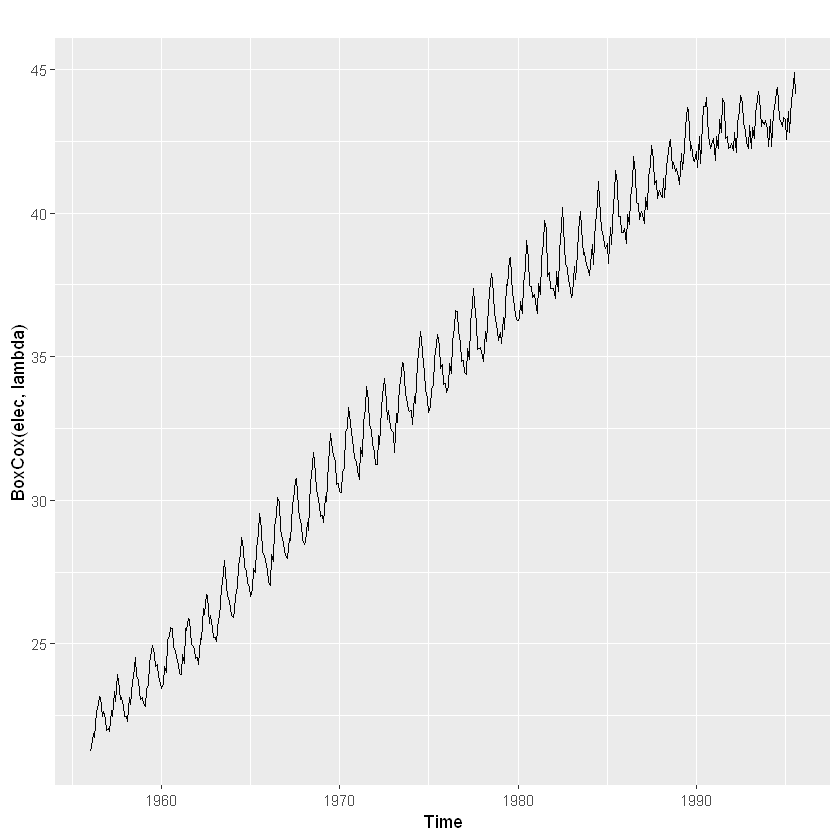

In [13]:
autoplot(BoxCox(elec,lambda))

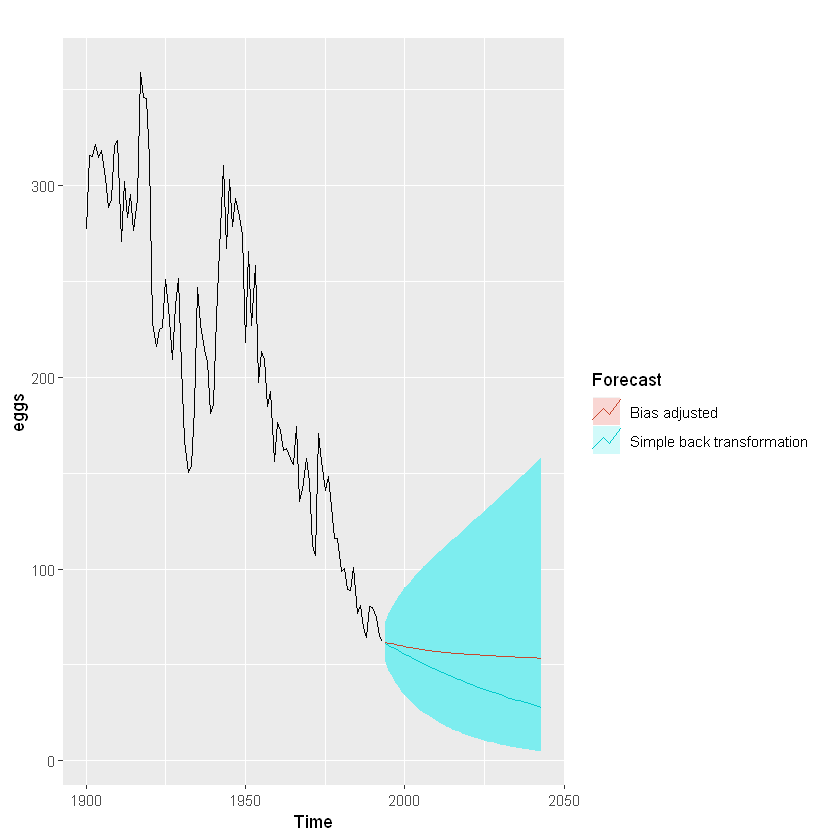

In [14]:
fc <- rwf(eggs, drift=TRUE, lambda=0, h=50, level=80)
fc2 <- rwf(eggs, drift=TRUE, lambda=0, h=50, level=80,
  biasadj=TRUE)
autoplot(eggs) +
  autolayer(fc, series="Simple back transformation") +
  autolayer(fc2, series="Bias adjusted", PI=FALSE) +
  guides(colour=guide_legend(title="Forecast"))

Bias adjustment is not done by default in the forecast package. If you want your forecasts to be means rather than medians, use the argument biasadj=TRUE when you select your Box-Cox transformation parameter.



# Residuals

The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts.


The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.m

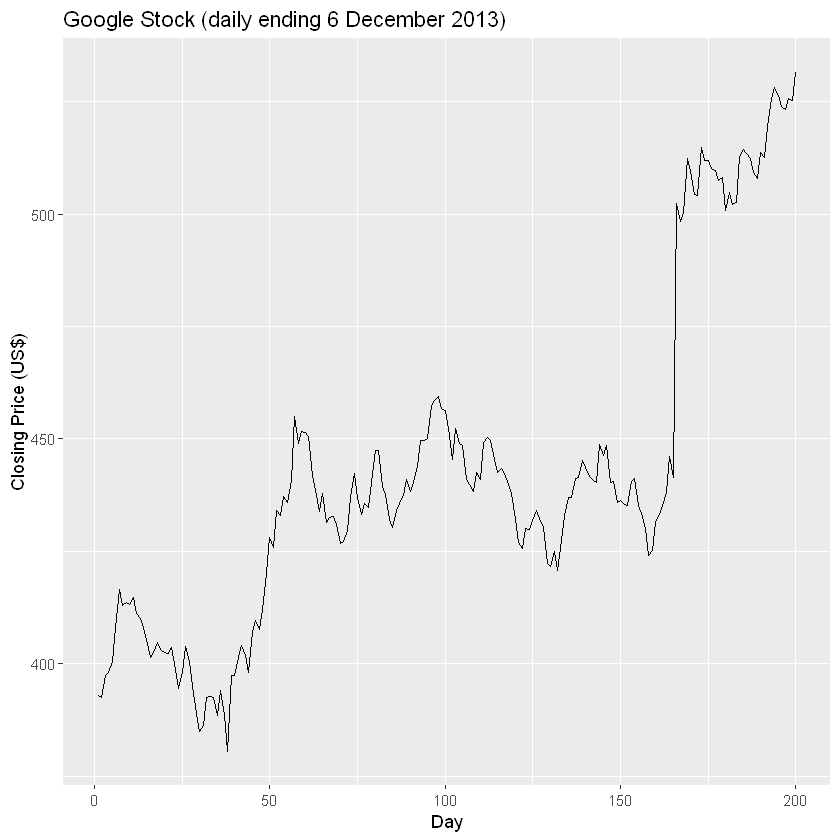

In [16]:
autoplot(goog200) +
  xlab("Day") + ylab("Closing Price (US$)") +
  ggtitle("Google Stock (daily ending 6 December 2013)")

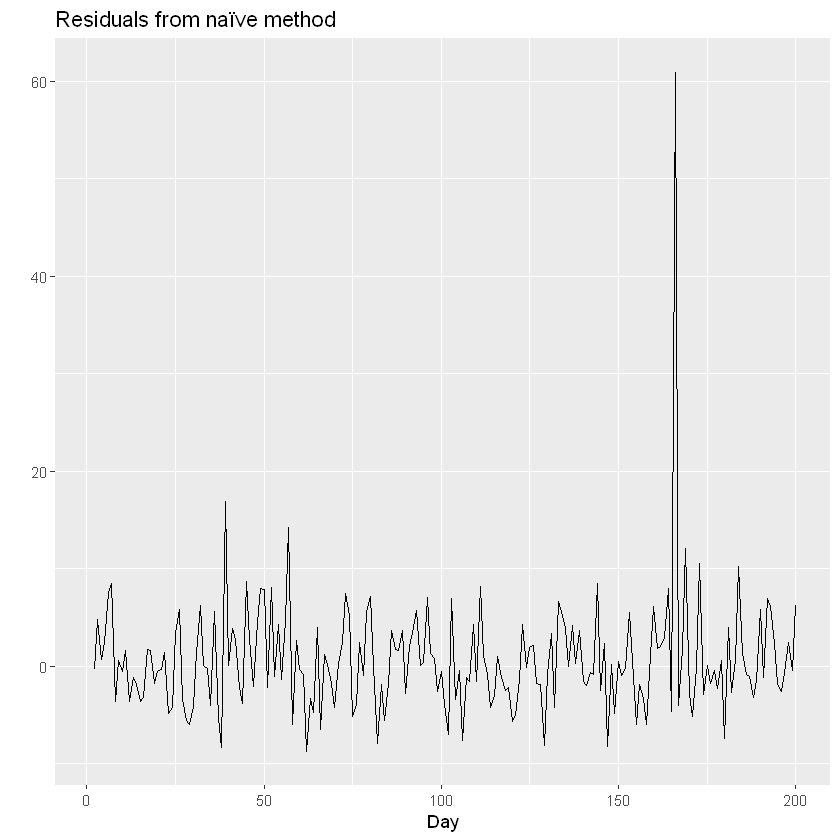

In [17]:
res <- residuals(naive(goog200))
autoplot(res) + xlab("Day") + ylab("") +
  ggtitle("Residuals from naïve method")

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

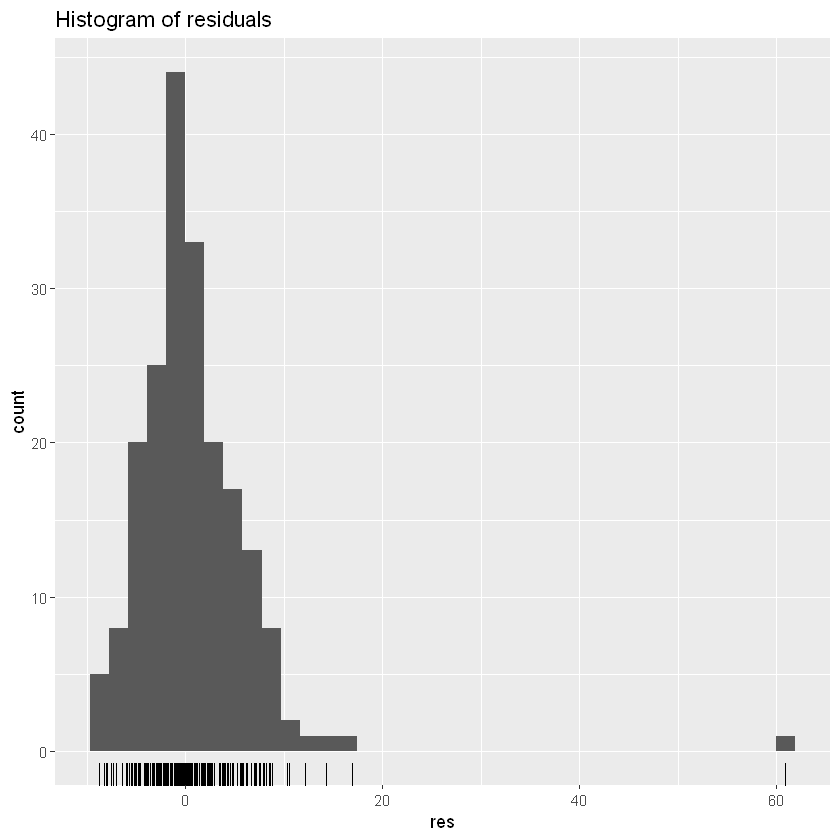

In [18]:
gghistogram(res) + ggtitle("Histogram of residuals")

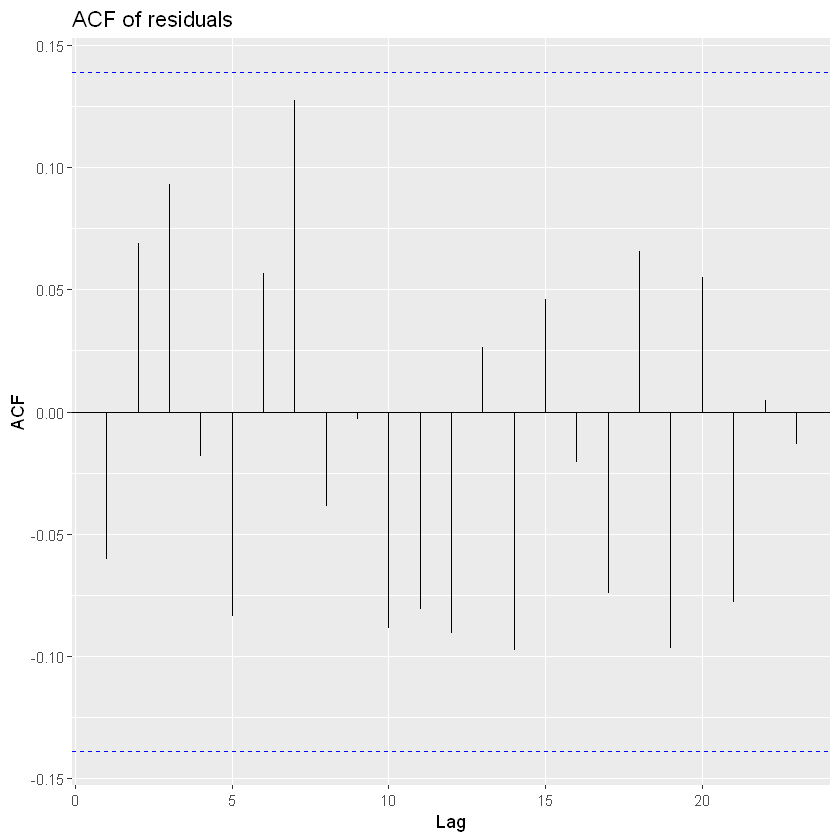

In [19]:
ggAcf(res) + ggtitle("ACF of residuals")

# Portmanteau tests for autocorrelation


We suggest using  
h
=
10
  for non-seasonal data and  
h
=
2
m
  for seasonal data, where  
m
  is the period of seasonality
  
  However, the test is not good when  
h
  is large, so if these values are larger than  
T
/
5
 , then use  
h
=
T
/
5

In [21]:
# lag=h and fitdf=K
Box.test(res, lag=10, fitdf=0)
#> 
#>  Box-Pierce test
#> 
#> data:  res
#> X-squared = 11, df = 10, p-value = 0.4

Box.test(res,lag=10, fitdf=0, type="Lj")
#> 
#>  Box-Ljung test
#> 
#> data:  res
#> X-squared = 11, df = 10, p-value = 0.4


	Box-Pierce test

data:  res
X-squared = 10.611, df = 10, p-value = 0.3886



	Box-Ljung test

data:  res
X-squared = 11.031, df = 10, p-value = 0.3551



	Ljung-Box test

data:  Residuals from Naive method
Q* = 11.031, df = 10, p-value = 0.3551

Model df: 0.   Total lags used: 10



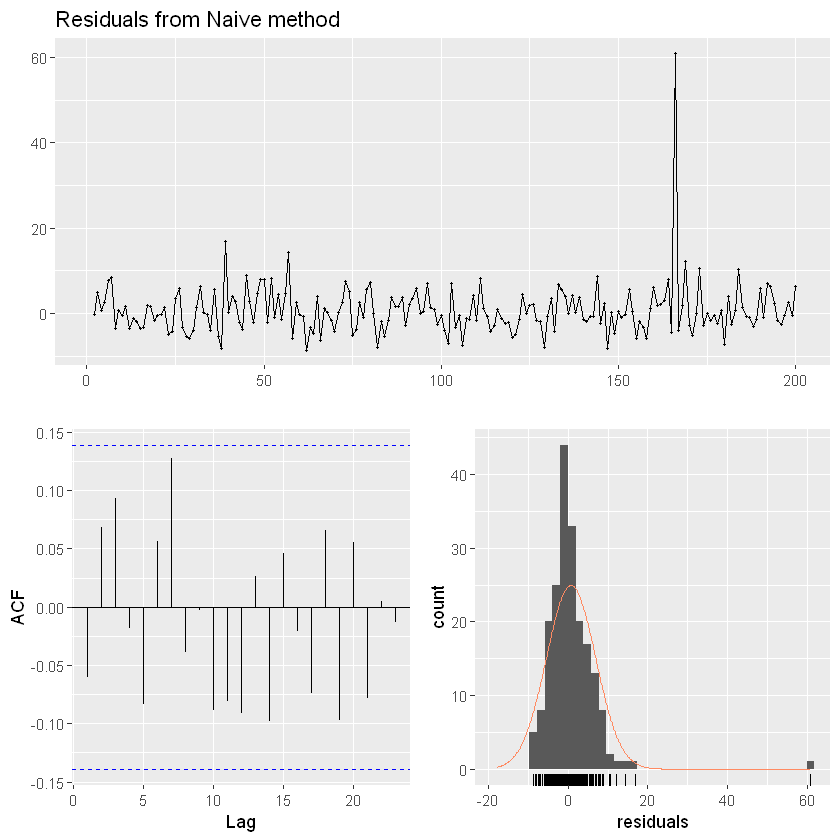

In [22]:
checkresiduals(naive(goog200))

# 3.4 Evaluating forecast accuracy


In [23]:
library(ggplot2)

In [24]:
library(forecast )

In [25]:
library(fpp2)

In [26]:
window(ausbeer, start=1995)

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Qtr1,Qtr2,Qtr3,Qtr4
1995,426,408,416,520
1996,409,398,398,507
1997,432,398,406,526
1998,428,397,403,517
1999,435,383,424,521
2000,421,402,414,500
2001,451,380,416,492
2002,428,408,406,506
2003,435,380,421,490
2004,435,390,412,454


In [27]:
subset(ausbeer, start=length(ausbeer)-4*5)

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Qtr1,Qtr2,Qtr3,Qtr4
2005,,403,408,482
2006,438,386,405,491
2007,427,383,394,473
2008,420,390,410,488
2009,415,398,419,488
2010,414,374,,


In [28]:
subset(ausbeer, quarter = 1)

ERROR while rich displaying an object: Error in if (many_rows) {: argument is of length zero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. repr_ts_gen

In [29]:
tail(ausbeer, 4*5)

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Qtr1,Qtr2,Qtr3,Qtr4
2005,,,408,482
2006,438,386,405,491
2007,427,383,394,473
2008,420,390,410,488
2009,415,398,419,488
2010,414,374,,


Note that forecast errors are different from residuals in two ways. First, residuals are calculated on the training set while forecast errors are calculated on the test set. Second, residuals are based on one-step forecasts while forecast errors can involve multi-step forecasts.



A forecast method that minimises the MAE will lead to forecasts of the median, while minimising the RMSE will lead to forecasts of the mean. Consequently, the RMSE is also widely used, despite being more difficult to interpret.

In [ ]:
MAE RMSE MAPE sMAPE MASE


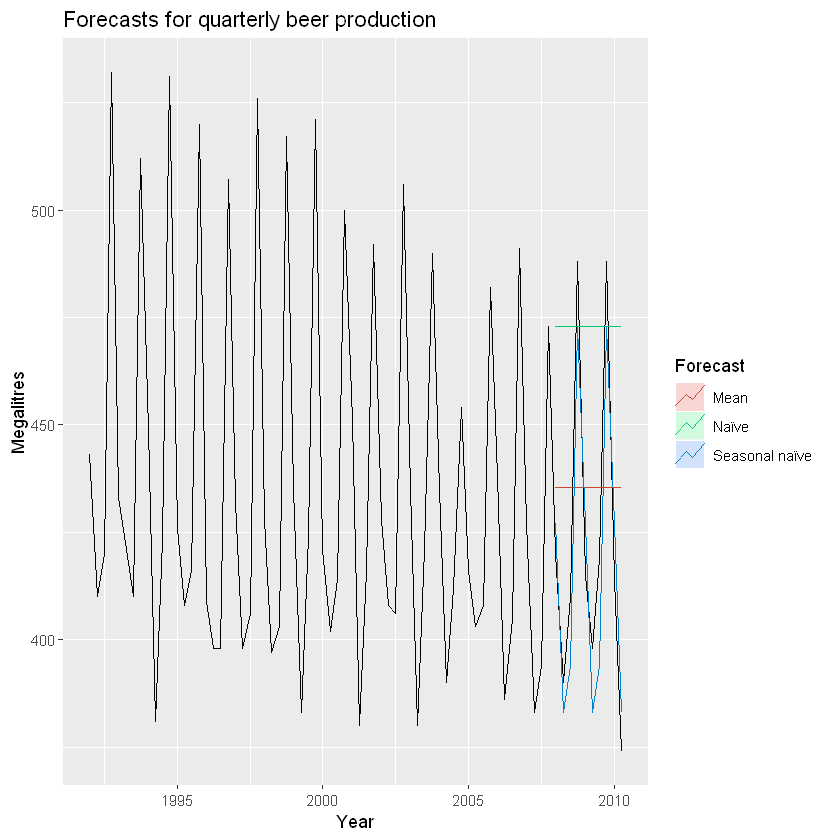

In [30]:
beer2 <- window(ausbeer,start=1992,end=c(2007,4))
beerfit1 <- meanf(beer2,h=10)
beerfit2 <- rwf(beer2,h=10)
beerfit3 <- snaive(beer2,h=10)
autoplot(window(ausbeer, start=1992)) +
  autolayer(beerfit1, series="Mean", PI=FALSE) +
  autolayer(beerfit2, series="Naïve", PI=FALSE) +
  autolayer(beerfit3, series="Seasonal naïve", PI=FALSE) +
  xlab("Year") + ylab("Megalitres") +
  ggtitle("Forecasts for quarterly beer production") +
  guides(colour=guide_legend(title="Forecast"))

In [31]:
beer3 <- window(ausbeer, start=2008)
accuracy(beerfit1, beer3)
accuracy(beerfit2, beer3)
accuracy(beerfit3, beer3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.000,43.62858,35.23438,-0.9365102,7.886776,2.463942,-0.10915105,NA
Test set,-13.775,38.44724,34.82500,-3.9698659,8.283390,2.435315,-0.06905715,0.801254


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.4761905,65.31511,54.73016,-0.9162496,12.16415,3.827284,-0.24098292,NA
Test set,-51.4000000,62.69290,57.40000,-12.9549160,14.18442,4.013986,-0.06905715,1.254009


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-2.133333,16.78193,14.3,-0.5537713,3.313685,1.0000000,-0.2876333,NA
Test set,5.200000,14.31084,13.4,1.1475536,3.168503,0.9370629,0.1318407,0.298728


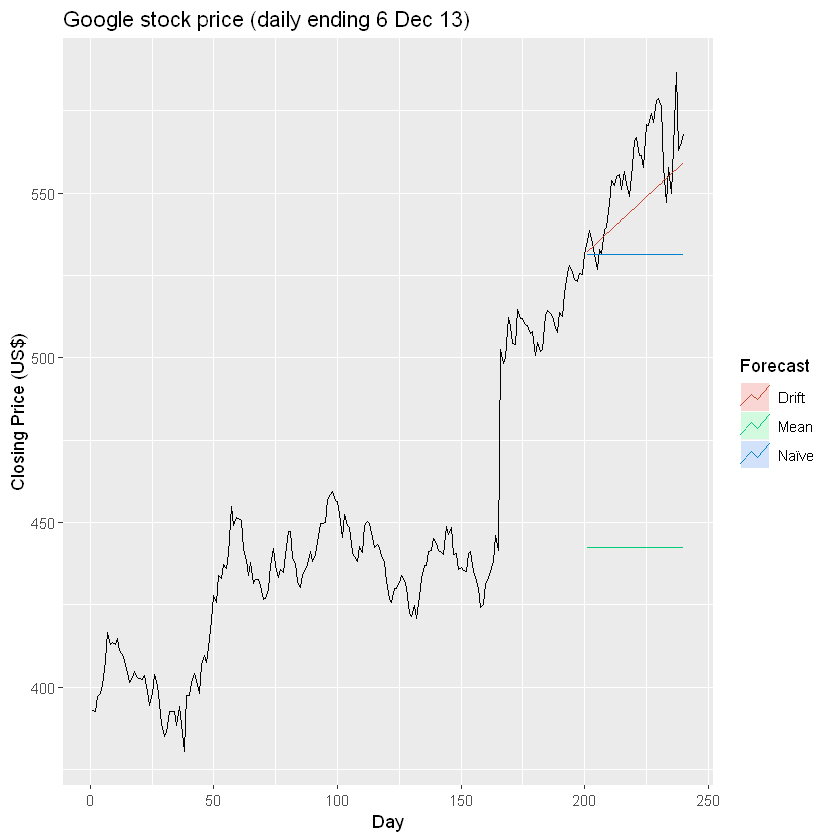

In [32]:
googfc1 <- meanf(goog200, h=40)
googfc2 <- rwf(goog200, h=40)
googfc3 <- rwf(goog200, drift=TRUE, h=40)
autoplot(subset(goog, end = 240)) +
  autolayer(googfc1, PI=FALSE, series="Mean") +
  autolayer(googfc2, PI=FALSE, series="Naïve") +
  autolayer(googfc3, PI=FALSE, series="Drift") +
  xlab("Day") + ylab("Closing Price (US$)") +
  ggtitle("Google stock price (daily ending 6 Dec 13)") +
  guides(colour=guide_legend(title="Forecast"))

In [33]:
googtest <- window(goog, start=201, end=240)
accuracy(googfc1, googtest)
accuracy(googfc2, googtest)
accuracy(googfc3, googtest)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-4.296286e-15,36.91961,26.86941,-0.6596884,5.95376,7.182995,0.9668981,NA
Test set,1.132697e+02,114.21375,113.26971,20.3222979,20.32230,30.280376,0.8104340,13.92142


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.6967249,6.208148,3.740697,0.1426616,0.8437137,1.000000,-0.06038617,NA
Test set,24.3677328,28.434837,24.593517,4.3171356,4.3599811,6.574582,0.81043397,3.451903


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-5.998536e-15,6.168928,3.824406,-0.01570676,0.8630093,1.022378,-0.06038617,NA
Test set,1.008487e+01,14.077291,11.667241,1.77566103,2.0700918,3.119002,0.64732736,1.709275


# Time series cross-validation


In [34]:
e <- tsCV(goog200, rwf, drift=TRUE, h=1)
sqrt(mean(e^2, na.rm=TRUE))
#> [1] 6.233
sqrt(mean(residuals(rwf(goog200, drift=TRUE))^2, na.rm=TRUE))
#> [1] 6.169

[1] 6.233245

[1] 6.168928

A good way to choose the best forecasting model is to find the model with the smallest RMSE computed using time series cross-validation.



# Pipe operator


In [36]:
goog200 %>% tsCV(forecastfunction=rwf, drift=TRUE, h=1) -> e
e^2 %>% mean(na.rm=TRUE) %>% sqrt()
#> [1] 6.233
goog200 %>% rwf(drift=TRUE) %>% residuals() -> res
res^2 %>% mean(na.rm=TRUE) %>% sqrt()
#> [1] 6.169

[1] 6.233245

[1] 6.168928

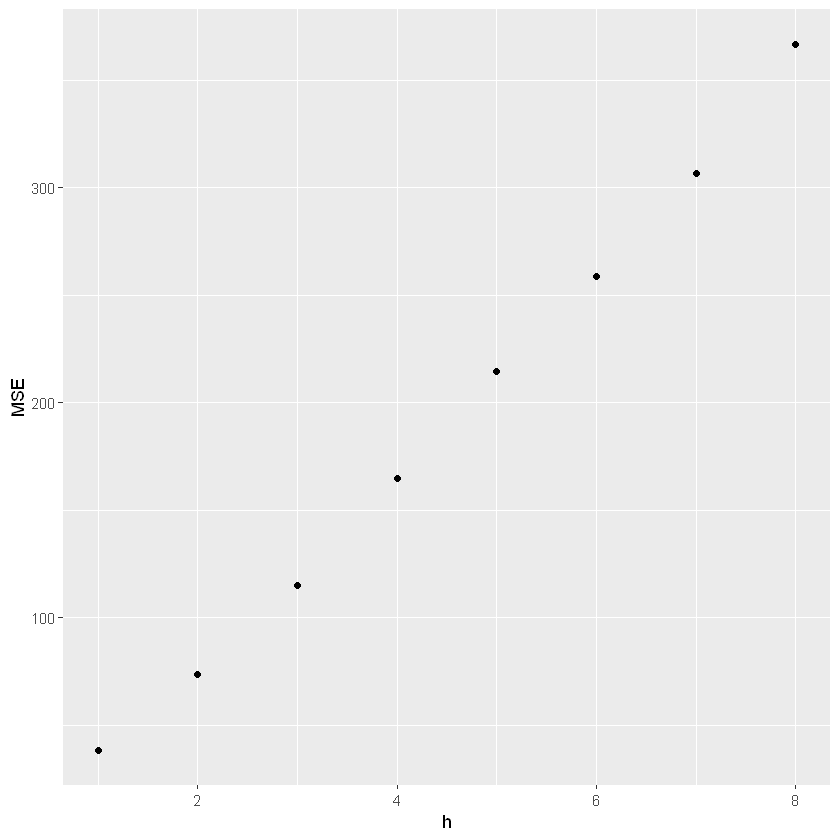

In [37]:
e <- tsCV(goog200, forecastfunction=naive, h=8)
# Compute the MSE values and remove missing values
mse <- colMeans(e^2, na.rm = T)
# Plot the MSE values against the forecast horizon
data.frame(h = 1:8, MSE = mse) %>%
  ggplot(aes(x = h, y = MSE)) + geom_point()

# 3.5 Prediction Intervals

In [38]:
naive(goog200)
#>     Point Forecast Lo 80 Hi 80 Lo 95 Hi 95
#> 201          531.5 523.6 539.4 519.4 543.6
#> 202          531.5 520.3 542.7 514.3 548.6
#> 203          531.5 517.8 545.2 510.5 552.5
#> 204          531.5 515.6 547.3 507.2 555.7
#> 205          531.5 513.8 549.2 504.4 558.6
#> 206          531.5 512.1 550.9 501.8 561.2
#> 207          531.5 510.5 552.4 499.4 563.5
#> 208          531.5 509.1 553.9 497.2 565.8
#> 209          531.5 507.7 555.3 495.1 567.8
#> 210          531.5 506.4 556.5 493.1 569.8

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
201       531.4783 523.5222 539.4343 519.3105 543.6460
202       531.4783 520.2267 542.7298 514.2705 548.6861
203       531.4783 517.6980 545.2586 510.4031 552.5534
204       531.4783 515.5661 547.3904 507.1428 555.8138
205       531.4783 513.6880 549.2686 504.2704 558.6862
206       531.4783 511.9900 550.9666 501.6735 561.2830
207       531.4783 510.4285 552.5280 499.2854 563.6711
208       531.4783 508.9751 553.9814 497.0627 565.8939
209       531.4783 507.6101 555.3465 494.9750 567.9815
210       531.4783 506.3190 556.6375 493.0005 569.9561

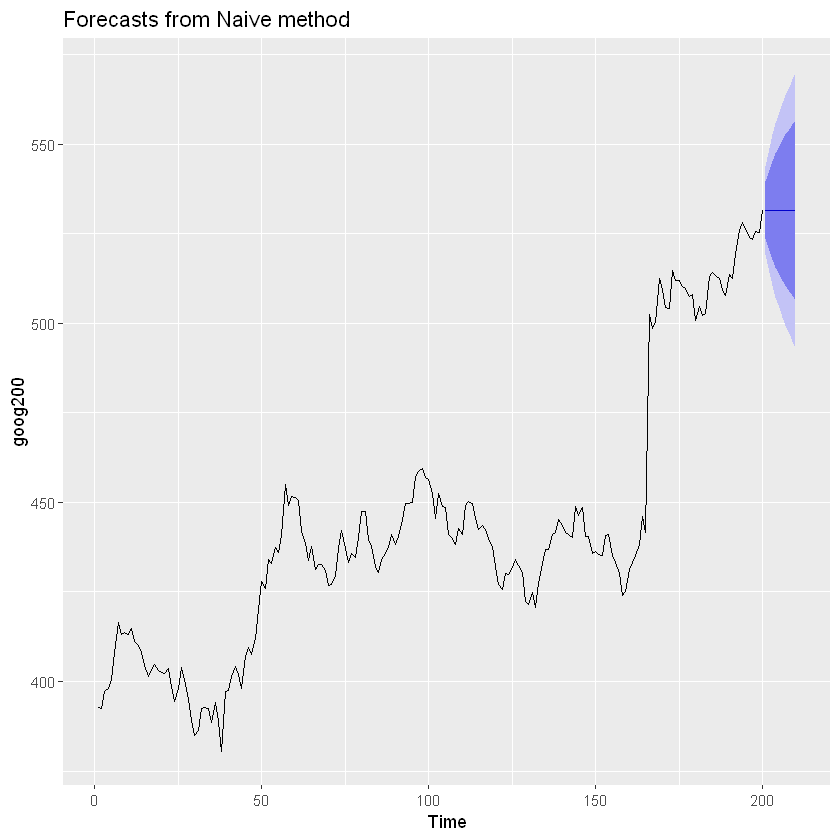

In [39]:
autoplot(naive(goog200))


In [40]:
naive(goog200, bootstrap=TRUE)
#>     Point Forecast Lo 80 Hi 80 Lo 95 Hi 95
#> 201          531.5 525.7 537.8 522.9 542.9
#> 202          531.5 523.2 539.5 519.4 547.0
#> 203          531.5 520.9 541.2 516.7 552.3
#> 204          531.5 519.0 543.0 514.0 560.3
#> 205          531.5 517.5 544.6 511.8 582.1
#> 206          531.5 516.1 545.9 509.5 582.4
#> 207          531.5 514.8 547.3 508.0 583.5
#> 208          531.5 513.5 548.9 505.8 584.9
#> 209          531.5 512.3 549.8 503.9 586.6
#> 210          531.5 510.7 551.4 502.1 587.5

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
201       531.4783 525.9331 537.7562 523.2307 541.0597
202       531.4783 523.4101 539.3169 520.0171 546.1266
203       531.4783 521.2808 541.6316 517.0452 551.3430
204       531.4783 519.2903 543.2480 514.3879 557.0275
205       531.4783 517.8592 544.4173 512.0091 575.4476
206       531.4783 516.4011 546.2311 509.8604 580.3505
207       531.4783 514.8811 547.3155 508.1131 582.2952
208       531.4783 513.7274 548.2107 506.3137 585.5460
209       531.4783 512.6083 549.6669 504.3535 587.7400
210       531.4783 511.6763 551.7613 502.4767 589.1527

# 3.6 The forecast package in R


In [ ]:
meanf()
naive(), snaive()
rwf()
croston()
stlf()
ses()
holt(), hw()
splinef()
thetaf()
forecast()

In [41]:
forecast(ausbeer, h=4)
#>         Point Forecast Lo 80 Hi 80 Lo 95 Hi 95
#> 2010 Q3          404.6 385.9 423.3 376.0 433.3
#> 2010 Q4          480.4 457.5 503.3 445.4 515.4
#> 2011 Q1          417.0 396.5 437.6 385.6 448.4
#> 2011 Q2          383.1 363.5 402.7 353.1 413.1

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2010 Q3       404.6025 385.8695 423.3355 375.9529 433.2521
2010 Q4       480.3982 457.5283 503.2682 445.4216 515.3748
2011 Q1       417.0367 396.5112 437.5622 385.6456 448.4277
2011 Q2       383.0996 363.5063 402.6930 353.1341 413.0651

# Exercises

In [44]:
usnetelec

ERROR while rich displaying an object: Error in if (many_rows) {: argument is of length zero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. repr_ts_gen

[1] 0.5167714

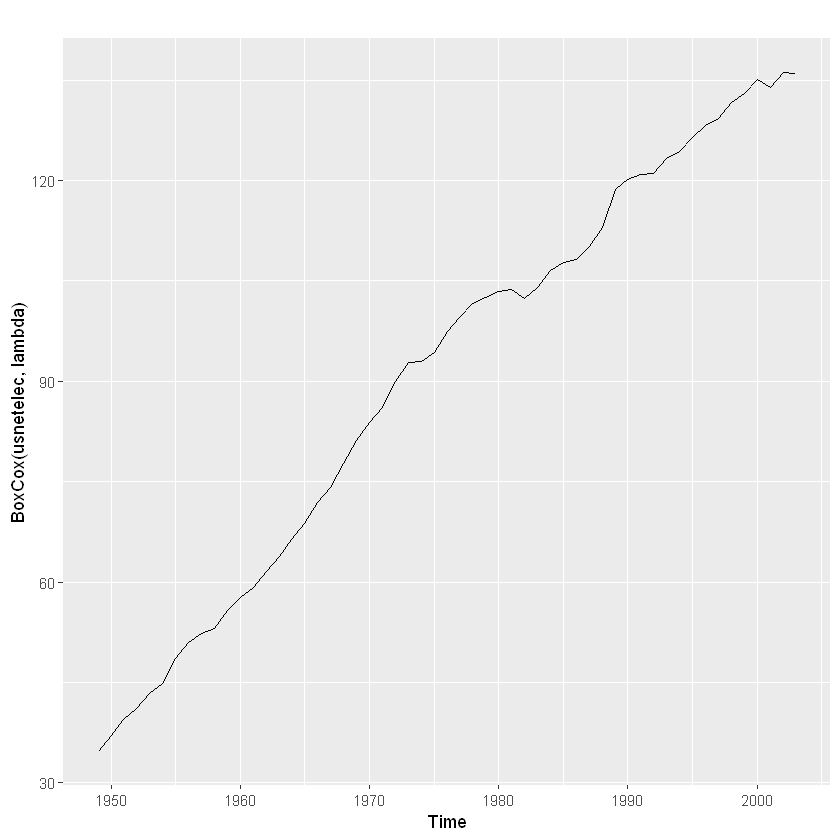

In [47]:
(lambda <- BoxCox.lambda(usnetelec))
#> [1] 0.2654
autoplot(BoxCox(usnetelec,lambda))

In [43]:
usgdp

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Qtr1,Qtr2,Qtr3,Qtr4
1947,1570.5,1568.7,1568.0,1590.9
1948,1616.1,1644.6,1654.1,1658.0
1949,1633.2,1628.4,1646.7,1629.9
1950,1696.8,1747.3,1815.8,1848.9
1951,1871.3,1903.1,1941.1,1944.4
1952,1964.7,1966.0,1978.8,2043.8
1953,2082.3,2098.1,2085.4,2052.5
1954,2042.4,2044.3,2066.9,2107.8
1955,2168.5,2204.0,2233.4,2245.3
1956,2234.8,2252.5,2249.8,2286.5


[1] 0.366352

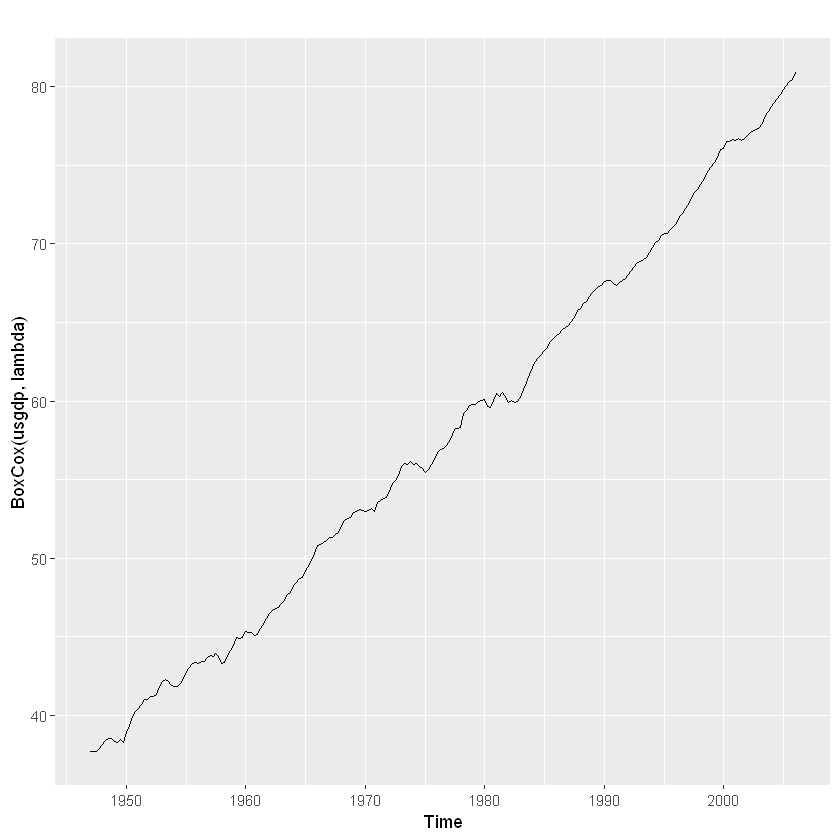

In [48]:
(lambda <- BoxCox.lambda(usgdp))
#> [1] 0.2654
autoplot(BoxCox(usgdp,lambda))

In [45]:
mcopper

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1960,255.2,259.7,249.3,258.0,244.3,246.8,250.6,241.3,231.0,218.7,222.8,227.5
1961,216.6,220.1,221.7,225.6,238.6,232.8,226.1,227.2,225.8,225.0,225.7,226.3
1962,226.8,231.3,231.1,230.6,230.5,230.4,230.4,230.4,230.4,230.6,230.4,230.5
1963,230.6,230.6,230.6,230.6,230.6,230.6,230.6,230.6,230.6,230.6,230.6,232.2
1964,234.2,247.8,266.1,307.7,295.8,288.8,305.4,356.9,415.0,485.1,500.1,453.3
1965,356.7,419.2,440.6,480.5,490.8,466.1,404.0,431.6,473.5,500.1,523.8,541.4
1966,599.0,668.7,668.7,679.9,592.8,604.8,559.5,426.4,402.4,454.9,464.4,433.4
1967,443.7,435.4,391.8,354.9,369.5,362.3,355.9,372.7,378.3,406.3,515.3,551.3
1968,586.4,715.8,708.0,522.4,456.5,473.0,439.9,439.9,462.3,449.7,458.0,493.4
1969,523.8,535.0,532.4,578.1,579.6,617.0,605.4,669.0,657.6,647.4,679.4,707.8


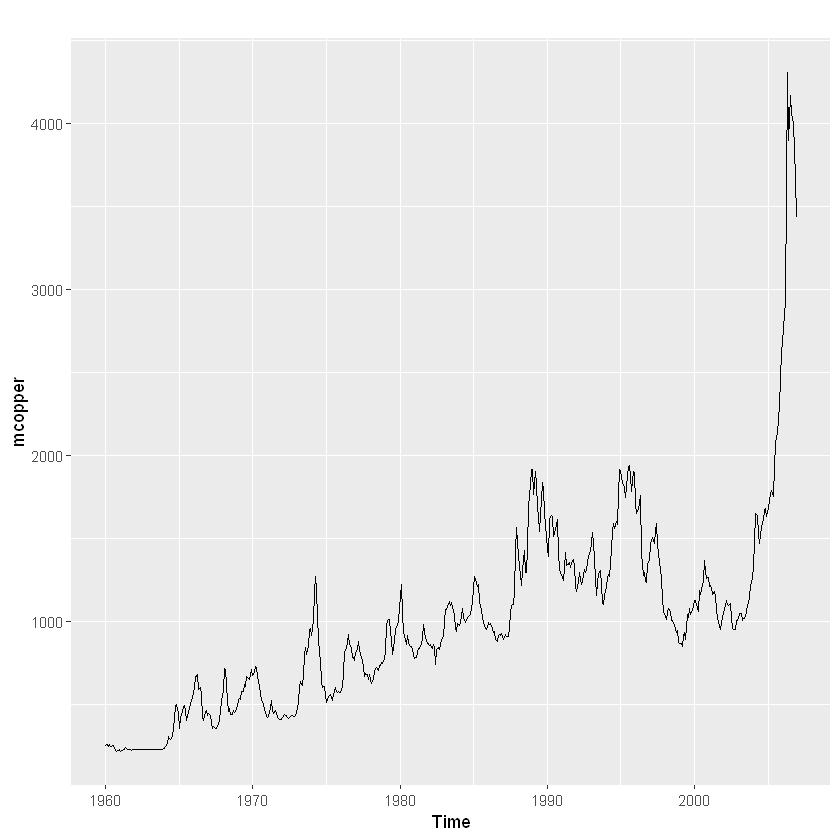

In [50]:
autoplot(mcopper)

[1] 0.1919047

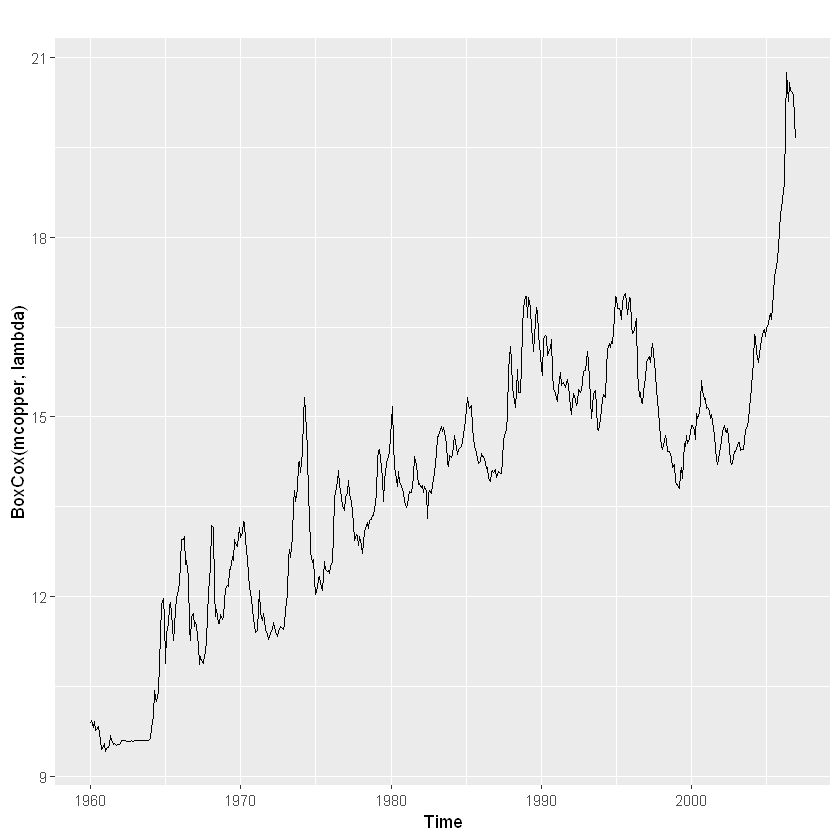

In [49]:
(lambda <- BoxCox.lambda(mcopper))
#> [1] 0.2654
autoplot(BoxCox(mcopper,lambda))

In [46]:
enplanements

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1979,21.12,22.92,25.90,24.38,23.41,26.82,26.90,28.72,22.87,23.10,23.11,22.14
1980,21.35,22.23,24.40,23.41,22.06,24.53,24.00,24.97,20.57,21.55,20.14,21.39
1981,20.24,20.63,22.03,22.68,22.80,23.78,24.16,22.64,20.50,21.44,20.91,21.70
1982,20.52,21.66,23.82,24.01,22.52,24.68,24.19,24.73,20.85,21.84,21.70,22.38
1983,21.83,23.44,26.98,24.61,24.10,26.67,25.63,26.40,23.17,24.24,23.88,23.96
1984,22.60,23.67,27.00,26.91,26.63,28.93,27.72,29.79,25.61,26.81,26.97,26.30
1985,25.35,26.91,31.60,31.09,30.70,32.09,32.02,33.16,26.82,28.68,27.80,30.46
1986,28.07,30.01,34.12,32.90,32.92,34.86,35.67,37.81,30.65,31.96,31.01,32.30
1987,28.72,33.39,37.76,37.51,35.87,36.86,37.71,38.41,31.65,32.87,32.23,31.88
1988,29.64,32.87,37.12,35.32,34.82,36.97,36.89,38.76,32.99,34.59,34.28,32.56


[1] -0.2269461

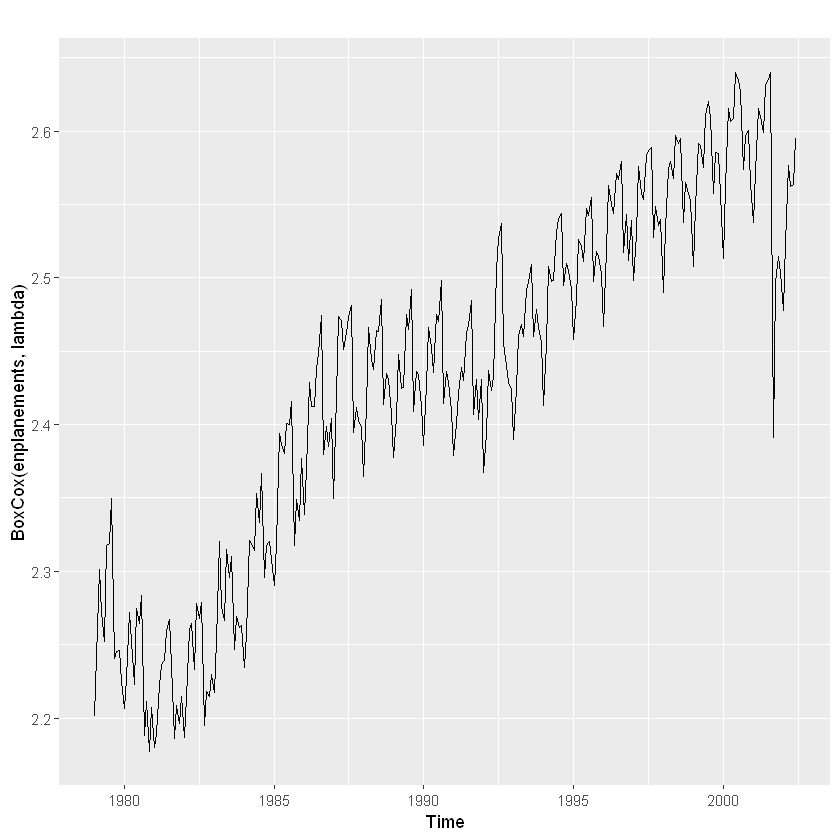

In [51]:
(lambda <- BoxCox.lambda(enplanements))
#> [1] 0.2654
autoplot(BoxCox(enplanements,lambda))

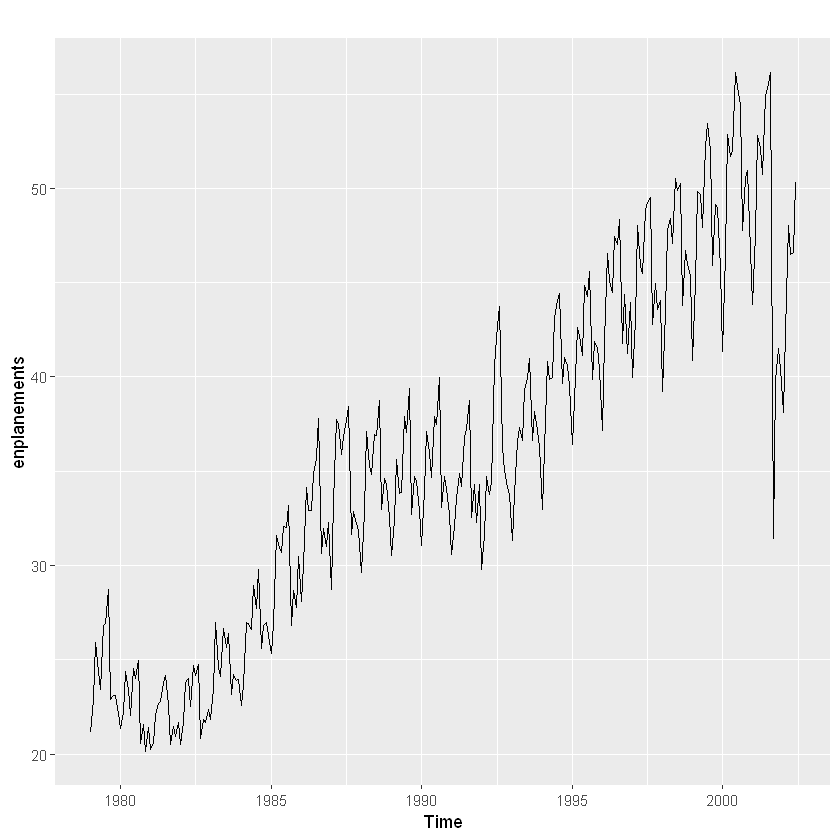

In [52]:
autoplot(enplanements)

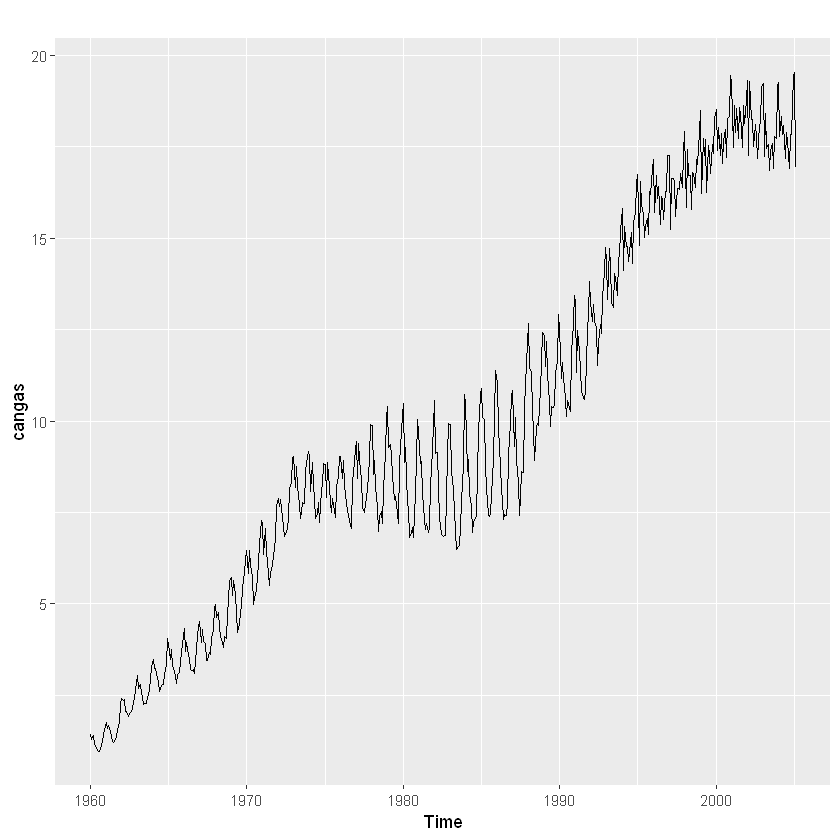

In [53]:
autoplot(cangas)

[1] -0.2269461

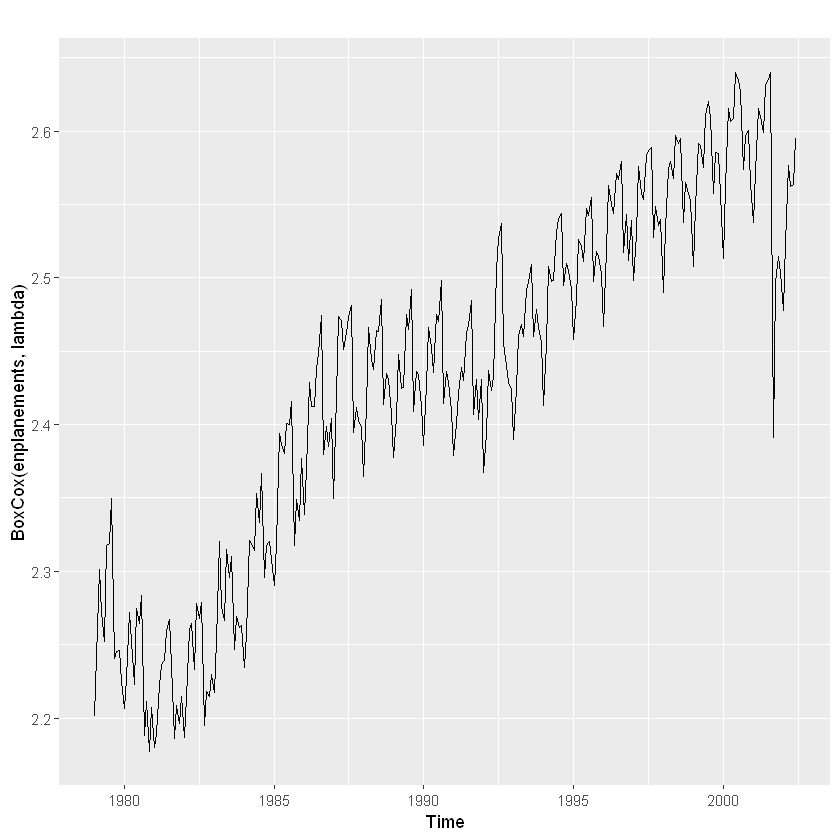

In [54]:
(lambda <- BoxCox.lambda(enplanements))
#> [1] 0.2654
autoplot(BoxCox(enplanements,lambda))

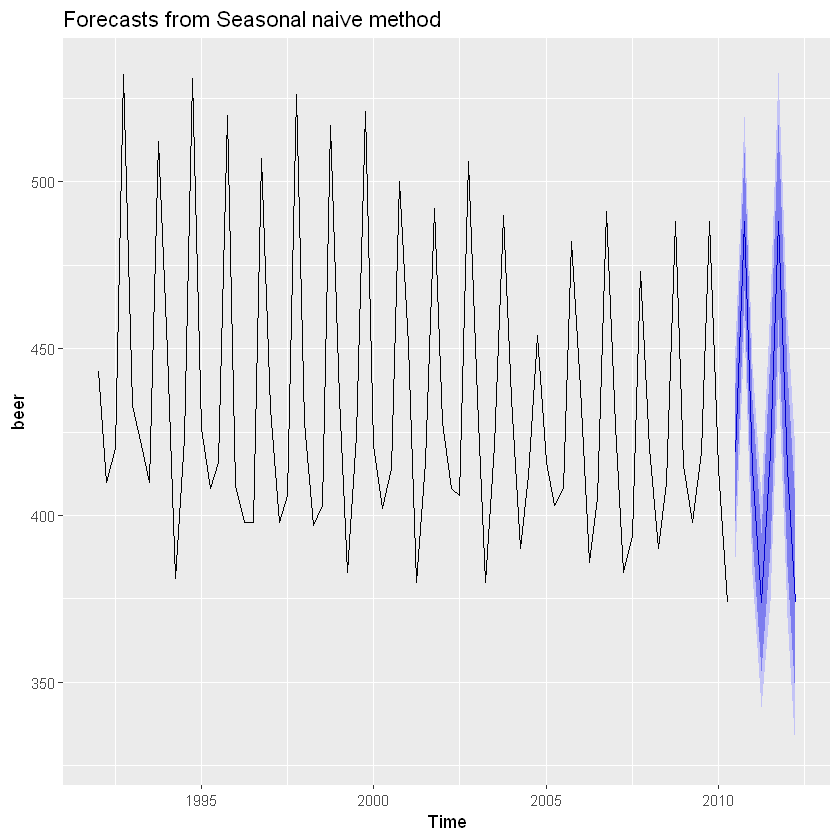

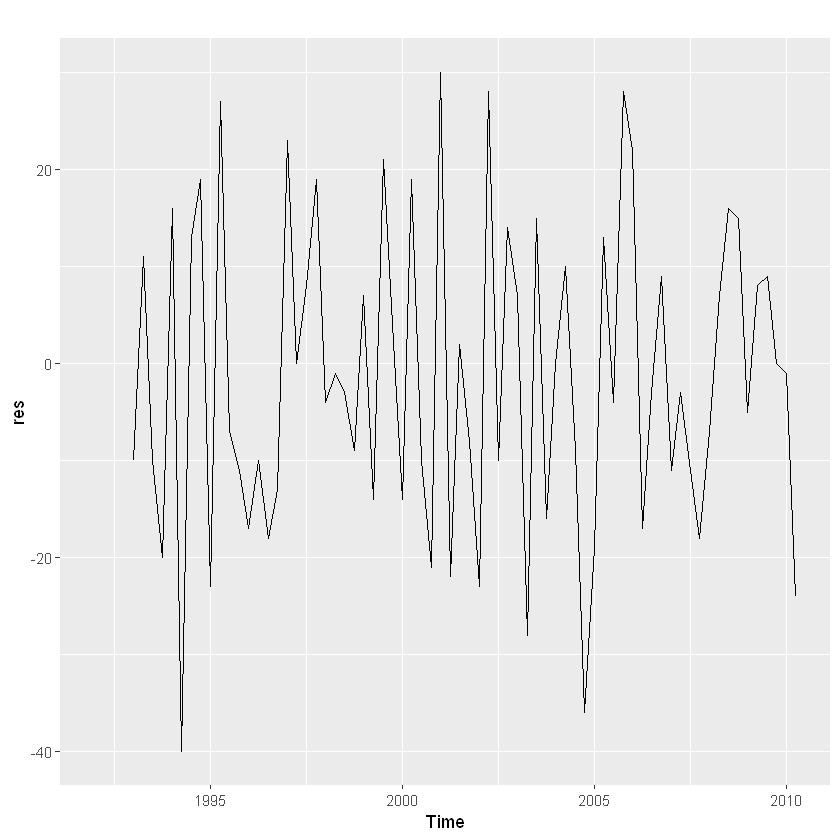

In [55]:
beer <- window(ausbeer, start=1992)
fc <- snaive(beer)
autoplot(fc)
res <- residuals(fc)
autoplot(res)


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 32.269, df = 8, p-value = 8.336e-05

Model df: 0.   Total lags used: 8



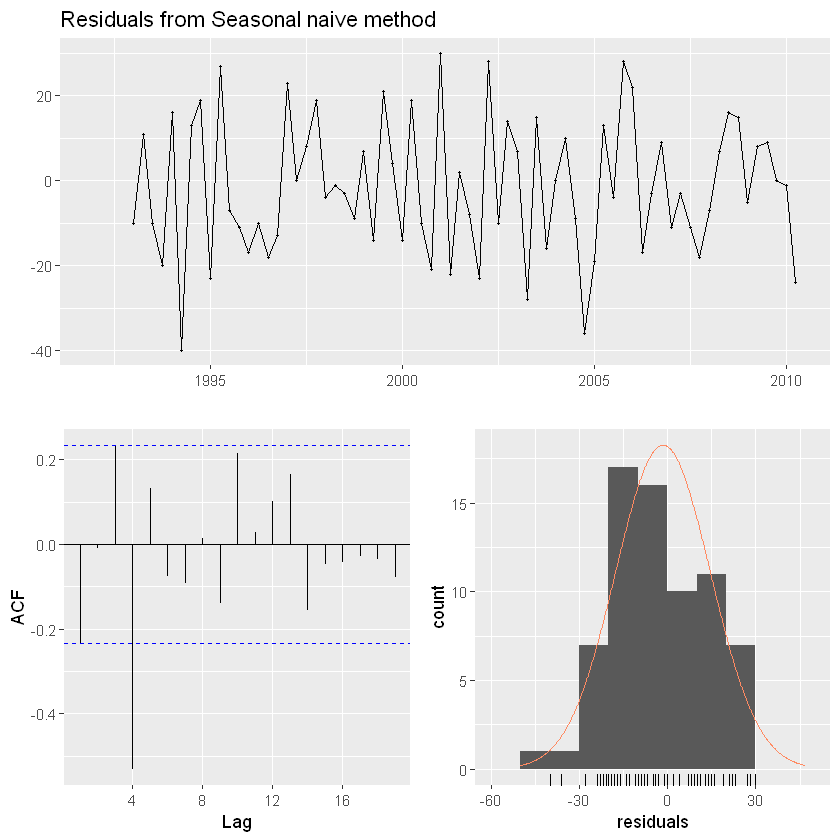

In [56]:
checkresiduals(fc)

In [57]:
retaildata <- readxl::read_excel("retail.xlsx", skip=1)

In [58]:
retaildata

Series ID,A3349335T,A3349627V,A3349338X,A3349398A,A3349468W,A3349336V,A3349337W,A3349397X,A3349399C,...,A3349333L,A3349860R,A3349464L,A3349389X,A3349461F,A3349788J,A3349547V,A3349388W,A3349870V,A3349396W
1982-04-01,303.1,41.7,63.9,408.7,65.8,91.8,53.6,211.3,94.0,...,460.1,135.1,64.9,125.6,153.5,479.1,146.3,196.1,342.4,3396.4
1982-05-01,297.8,43.1,64.0,404.9,65.8,102.6,55.4,223.8,105.7,...,502.6,134.9,67.7,128.7,154.8,486.1,145.5,196.6,342.1,3497.9
1982-06-01,298.0,40.3,62.7,401.0,62.3,105.0,48.4,215.7,95.1,...,443.8,128.2,65.5,125.0,148.8,467.5,140.2,188.5,328.7,3357.8
1982-07-01,307.9,40.9,65.6,414.4,68.2,106.0,52.1,226.3,95.3,...,459.1,129.9,68.5,136.6,156.1,491.1,146.5,192.0,338.5,3486.8
1982-08-01,299.2,42.1,62.6,403.8,66.0,96.9,54.2,217.1,82.8,...,438.4,133.0,65.2,134.7,152.8,485.7,138.8,192.7,331.5,3355.9
1982-09-01,305.4,42.0,64.4,411.8,62.3,97.5,53.6,213.4,89.4,...,465.1,135.5,66.8,130.4,157.2,489.9,144.3,197.6,341.9,3454.3
1982-10-01,318.0,46.1,66.0,430.1,66.2,99.3,58.0,223.5,83.3,...,452.7,140.6,67.7,132.0,160.6,500.9,146.6,211.9,358.4,3551.5
1982-11-01,334.4,46.5,65.3,446.2,68.9,107.8,67.2,243.9,99.3,...,522.9,145.7,73.6,135.7,176.1,531.1,159.3,215.4,374.7,3830.5
1982-12-01,389.6,53.8,77.9,521.3,90.8,155.5,146.3,392.6,142.9,...,889.3,194.0,95.8,176.7,258.7,725.2,192.6,240.5,433.1,5179.7
1983-01-01,311.4,43.8,65.1,420.3,58.0,95.1,66.6,219.7,78.5,...,379.2,138.6,64.9,128.5,159.3,491.4,141.8,226.9,368.6,3384.5


In [60]:
myts <- ts(retaildata[,"A3349873A"],
  frequency=12, start=c(1982,4))

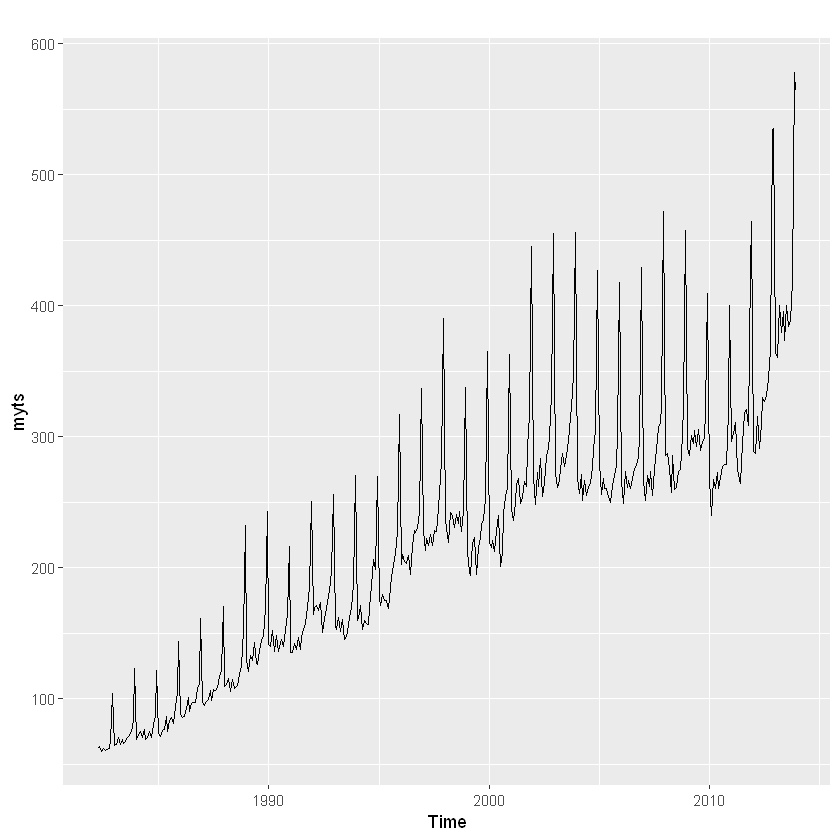

In [62]:
autoplot(myts)

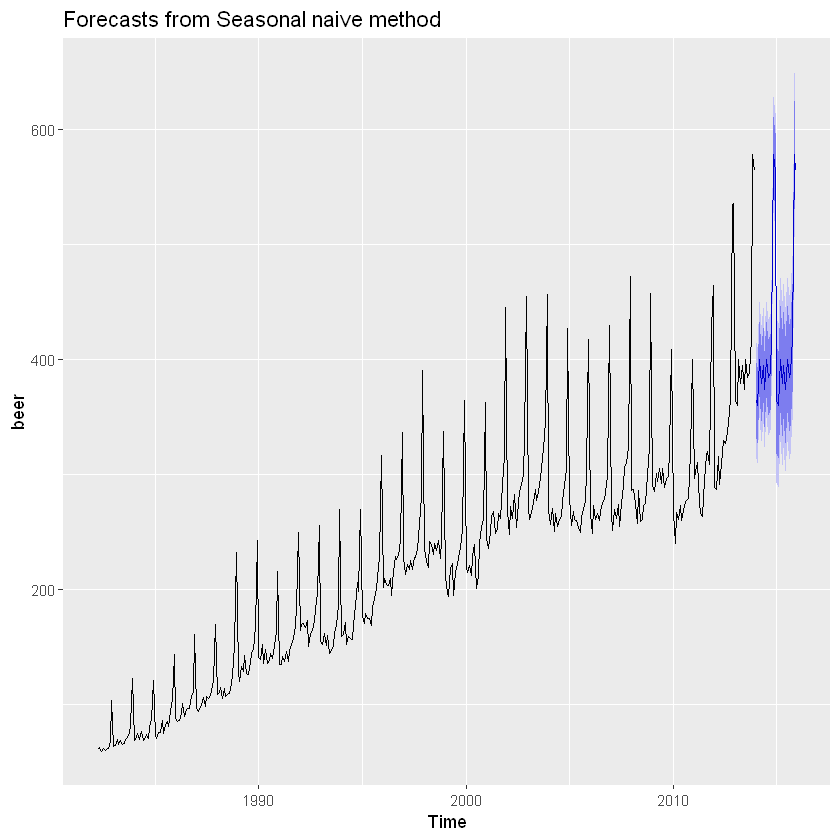

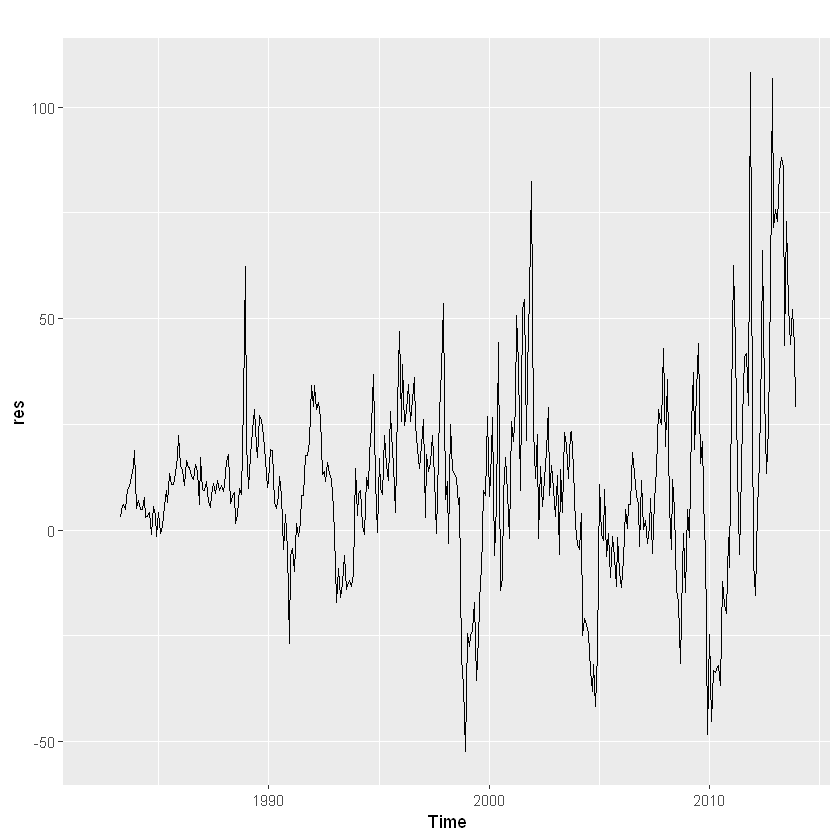

In [65]:
beer <- window(myts)
fc <- snaive(beer)
autoplot(fc)
res <- residuals(fc)
autoplot(res)


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 804.66, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



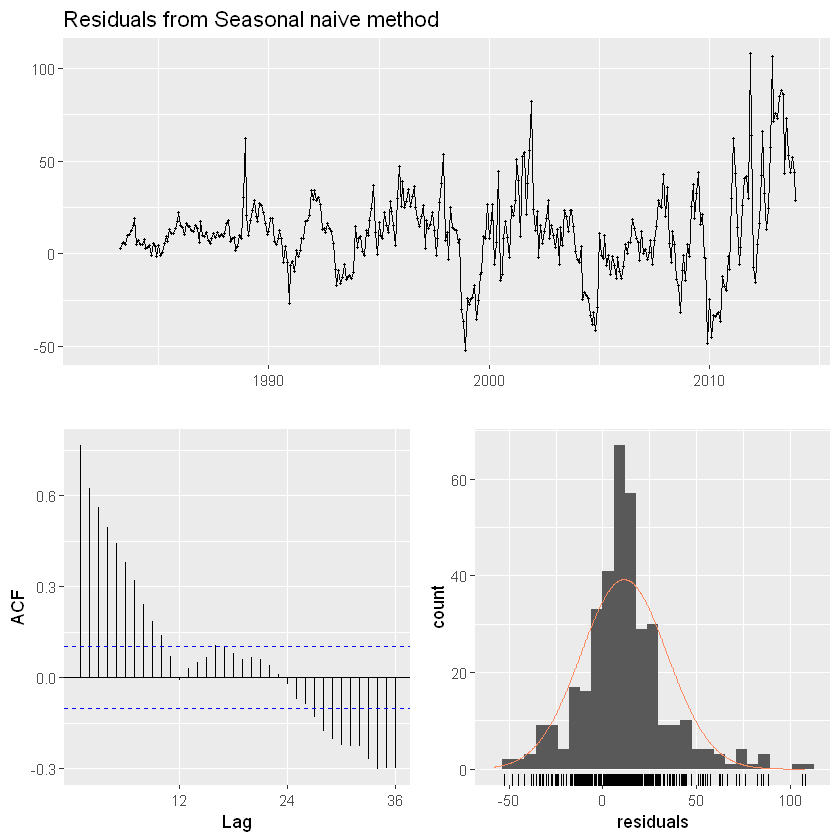

In [67]:
checkresiduals(fc)


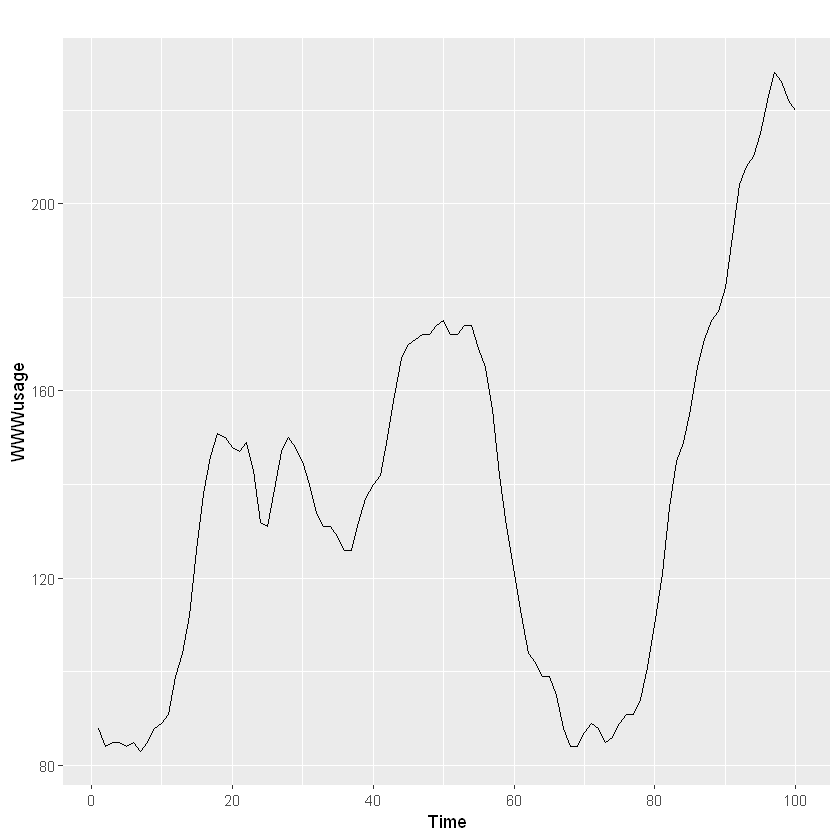

In [68]:
autoplot(WWWusage)

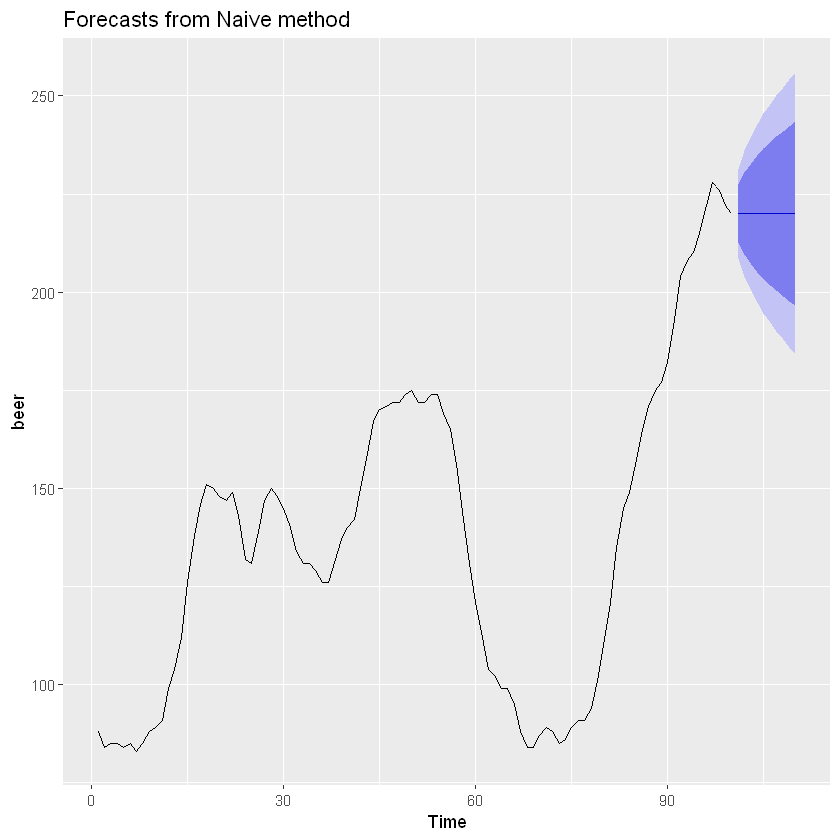

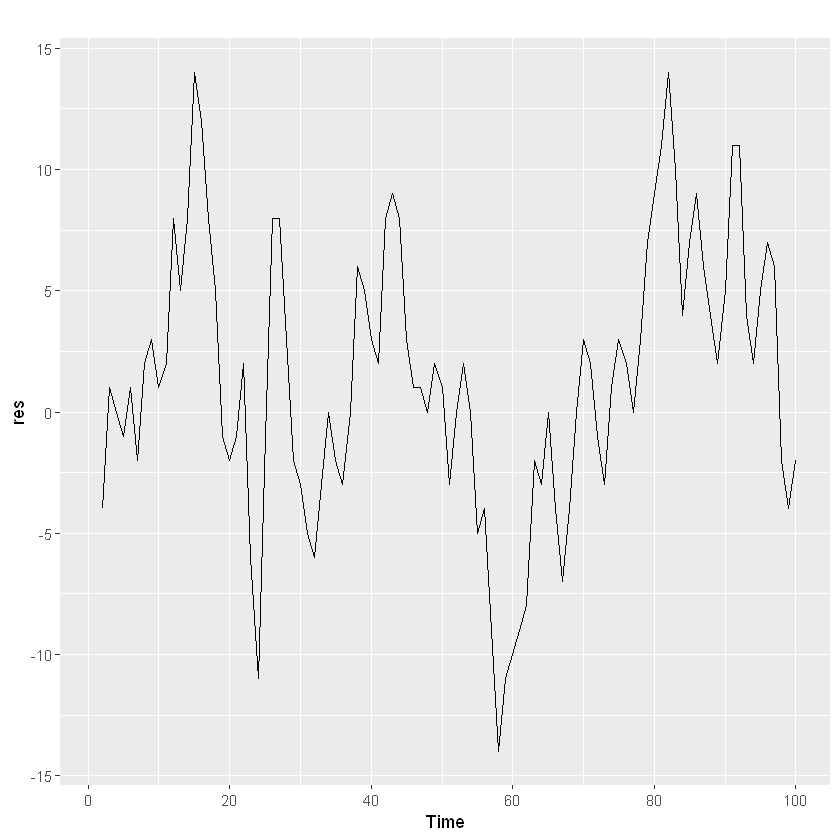

In [71]:
beer <- window(WWWusage)
fc <- naive(beer)
autoplot(fc)
res <- residuals(fc)
autoplot(res)


	Ljung-Box test

data:  Residuals from Naive method
Q* = 145.58, df = 10, p-value < 2.2e-16

Model df: 0.   Total lags used: 10



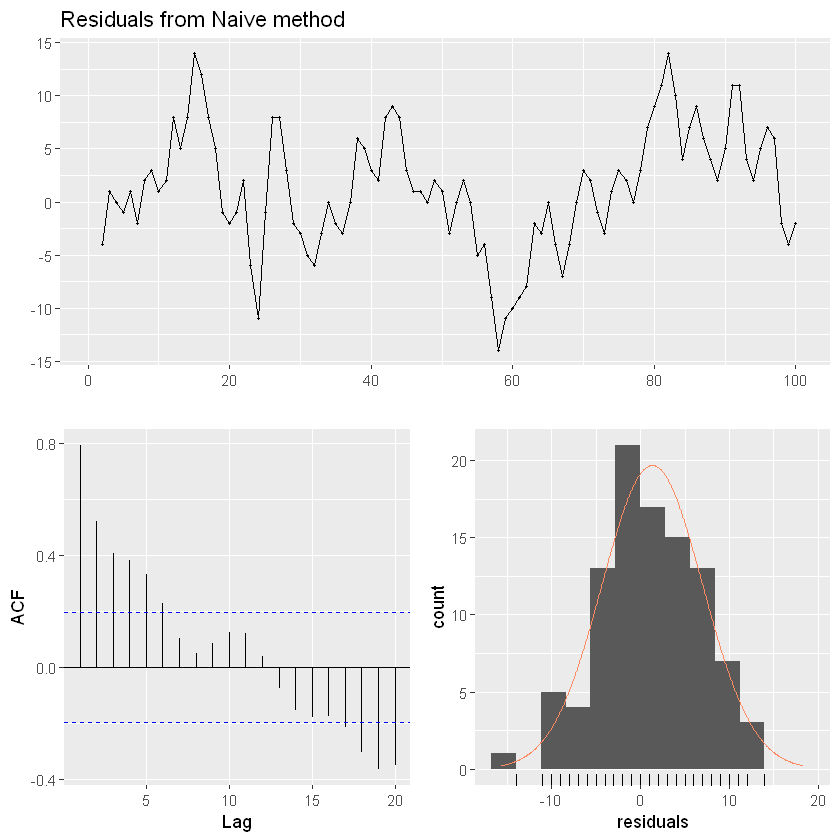

In [72]:
checkresiduals(fc)

In [73]:
myts.train <- window(myts, end=c(2010,12))
myts.test <- window(myts, start=2011)

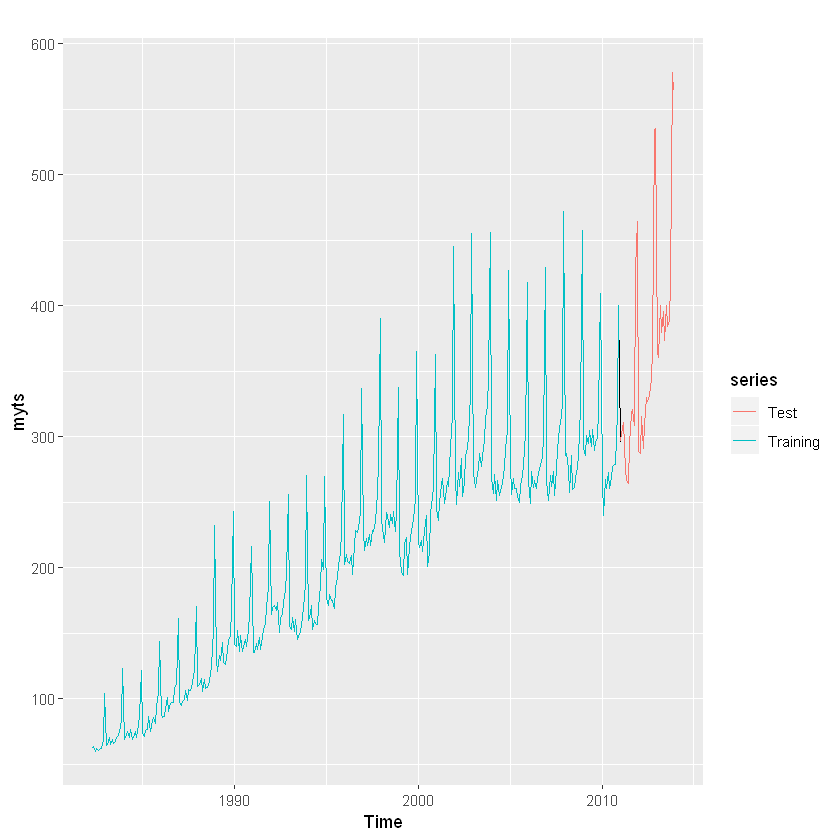

In [74]:
autoplot(myts) +
  autolayer(myts.train, series="Training") +
  autolayer(myts.test, series="Test")

In [75]:
fc <- snaive(myts.train)


In [76]:
accuracy(fc,myts.test)


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,7.772973,20.24576,15.95676,4.702754,8.109777,1.000000,0.7385090,NA
Test set,55.300000,71.44309,55.78333,14.900996,15.082019,3.495907,0.5315239,1.297866



	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 624.45, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



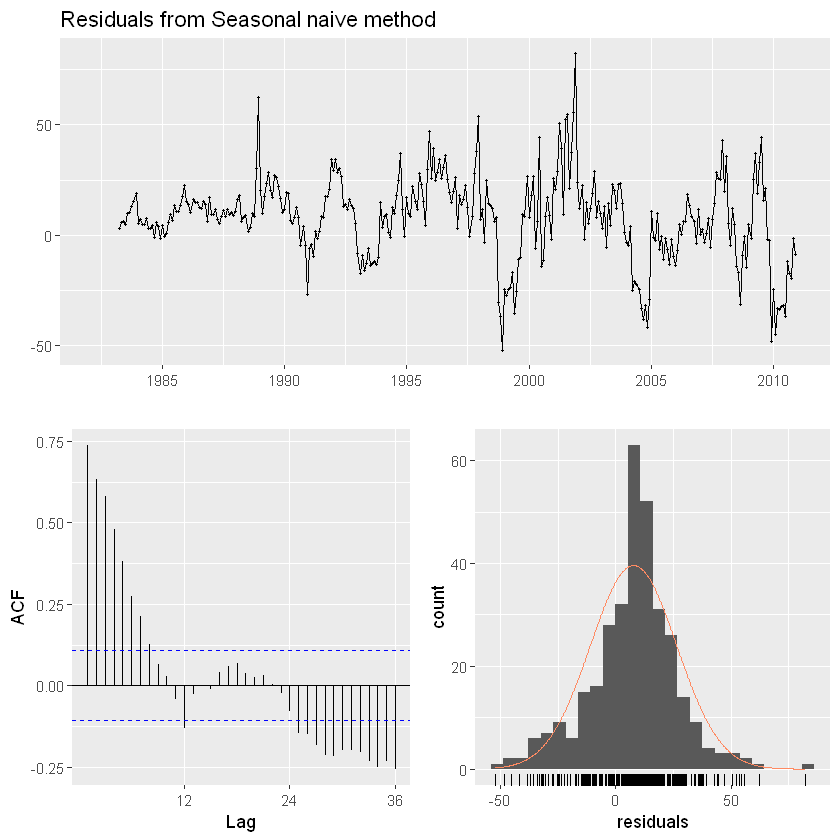

In [77]:
checkresiduals(fc)

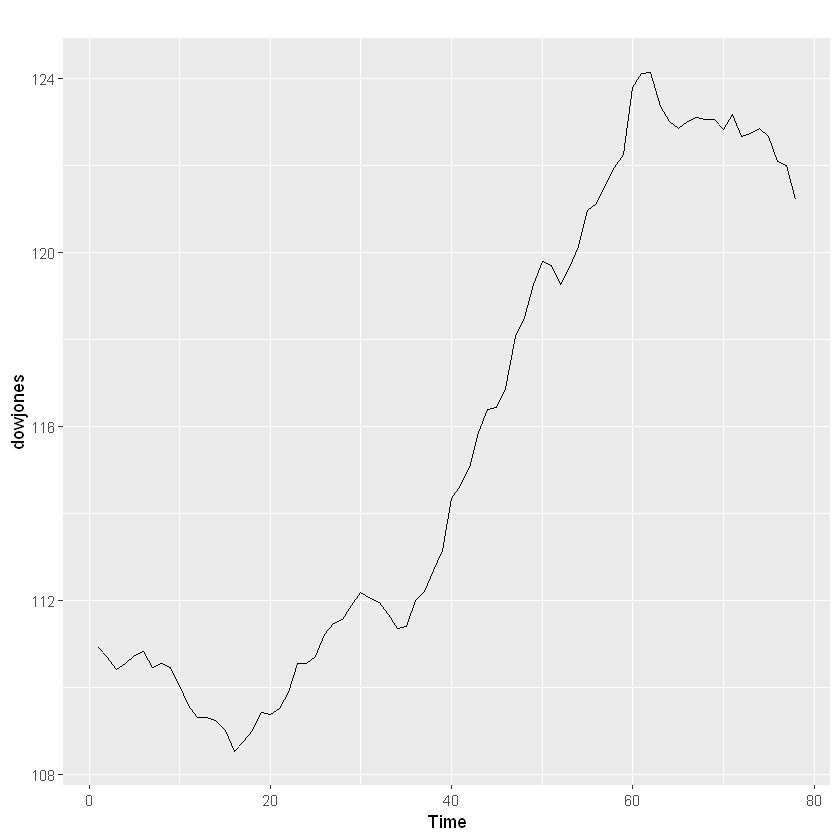

In [80]:
autoplot(dowjones)

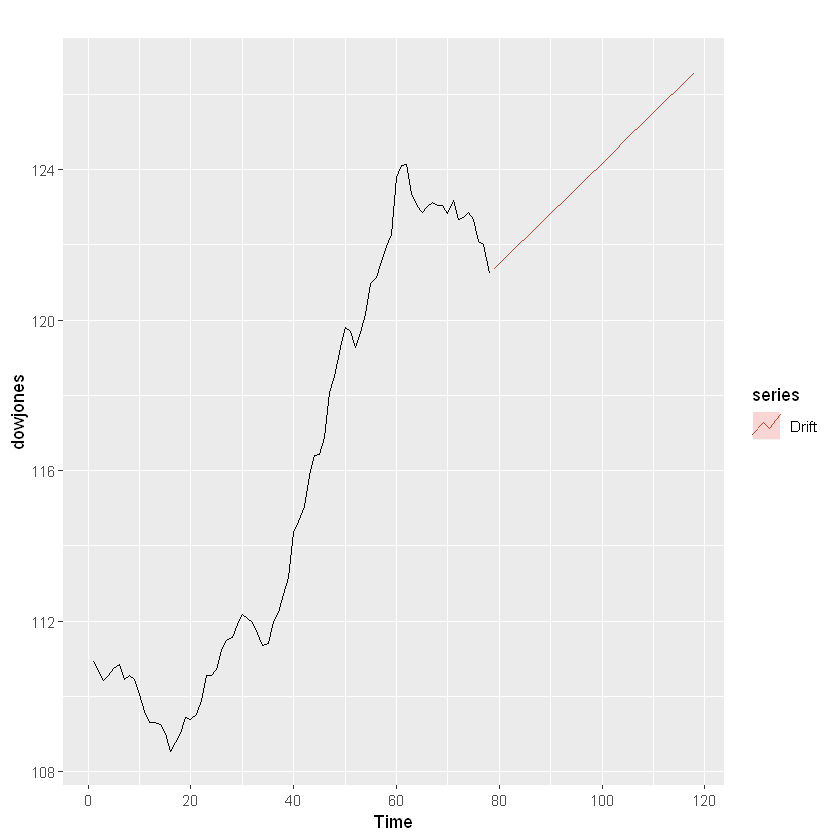

In [82]:
autoplot(dowjones) +
  autolayer(rwf(dowjones, drift=TRUE, h=40),
    series="Drift", PI=FALSE)


In [95]:
dowjones[78] - dowjones[1] 

[1] 10.29

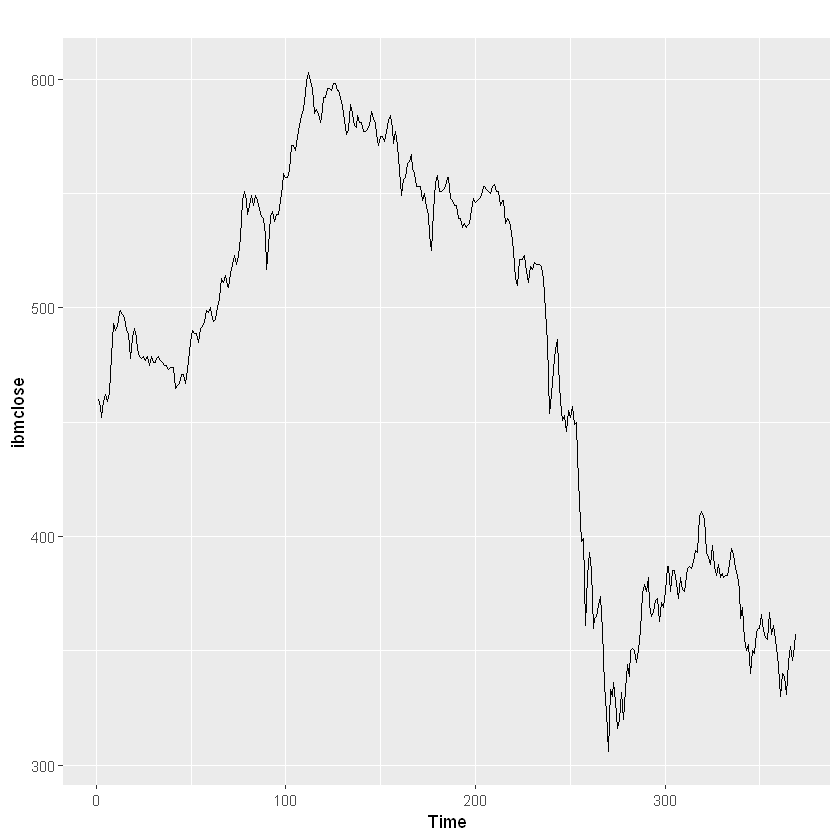

In [96]:
autoplot(ibmclose)

In [97]:
ibmclose.train <- window(ibmclose,  end=300 )  
ibmclose.test <- window(ibmclose, start= 301)

In [98]:
ibmclose.test

ERROR while rich displaying an object: Error in if (many_rows) {: argument is of length zero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. repr_ts_gen

In [106]:
length(ibmclose.test)

[1] 69

In [107]:
length(ibmclose.train)

[1] 300

mapping: x = ~x, y = ~y, colour = ~series 
geom_forecast: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

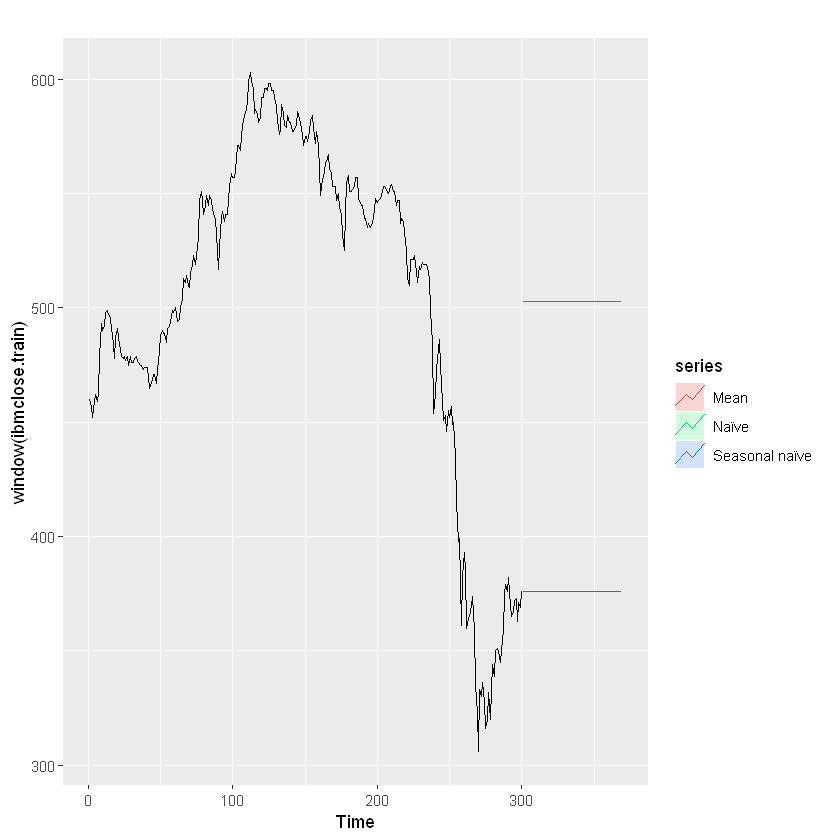

In [124]:
beer2 <- window(ibmclose.train)
beerfit1 <- meanf(beer2,h=69)
beerfit2 <- rwf(beer2,h=69)
beerfit3 <- snaive(beer2,h=69)
beerfit4 <- rwf(beer2, drift=TRUE, h=69)

autoplot(window(ibmclose.train))+
  autolayer(beerfit1, series="Mean", PI=FALSE) +
  autolayer(beerfit2, series="Naïve", PI=FALSE) +
  autolayer(beerfit3, series="Seasonal naïve", PI=FALSE)
  autolayer(beerfit4, series="drift", PI=FALSE)

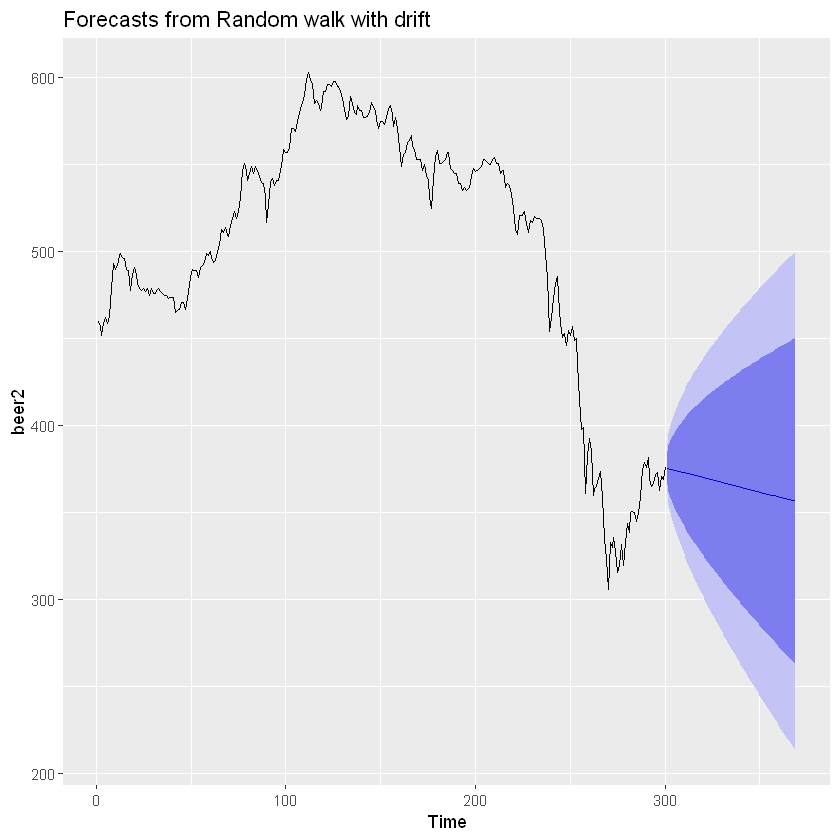

In [125]:
autoplot(beerfit4)

In [126]:
accuracy(beerfit1, ibmclose.test)
accuracy(beerfit2, ibmclose.test)
accuracy(beerfit3, ibmclose.test)
accuracy(beerfit4, ibmclose.test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.660438e-14,73.61532,58.72231,-2.642058,13.03019,11.52098,0.9895779,NA
Test set,-1.306180e+02,132.12557,130.61797,-35.478819,35.47882,25.62649,0.9314689,19.05515


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.2809365,7.302815,5.09699,-0.08262872,1.115844,1.000000,0.1351052,NA
Test set,-3.7246377,20.248099,17.02899,-1.29391743,4.668186,3.340989,0.9314689,2.973486


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.2809365,7.302815,5.09699,-0.08262872,1.115844,1.000000,0.1351052,NA
Test set,-3.7246377,20.248099,17.02899,-1.29391743,4.668186,3.340989,0.9314689,2.973486


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.870480e-14,7.297409,5.127996,-0.02530123,1.121650,1.006083,0.1351052,NA
Test set,6.108138e+00,17.066963,13.974747,1.41920066,3.707888,2.741765,0.9045875,2.361092



	Ljung-Box test

data:  Residuals from Random walk with drift
Q* = 22.555, df = 9, p-value = 0.007278

Model df: 1.   Total lags used: 10



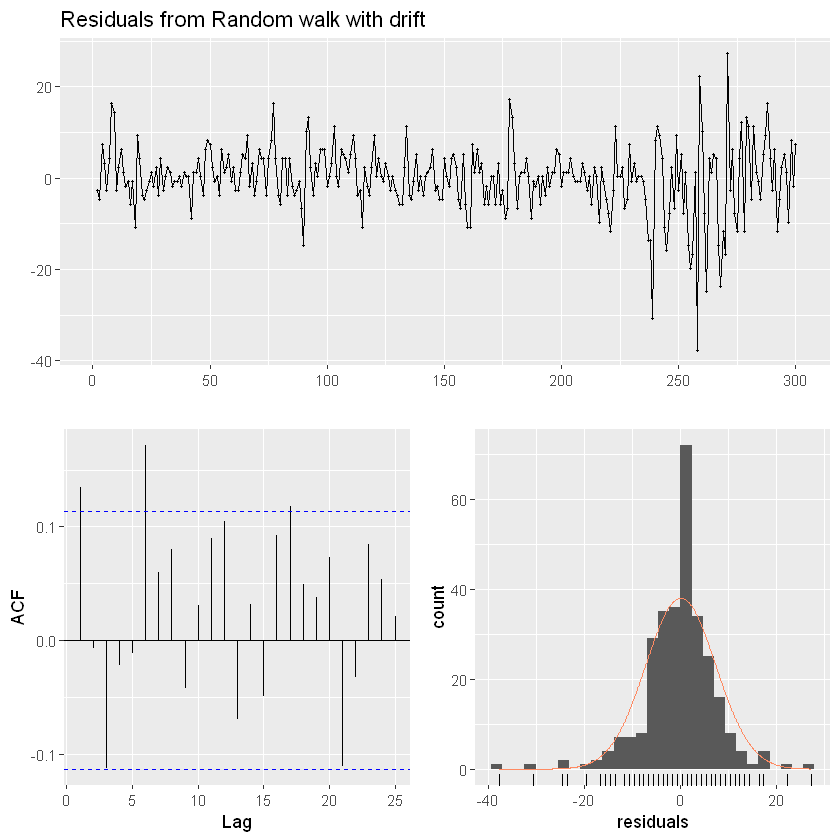

In [128]:

checkresiduals(rwf(beer2, drift=TRUE) )